#### Introduction 
Hello! This is a project with domain voice gender recognition.
We have to extract some features from our mp3 data and then with some deep learning methods to predict the gender of this voice record.

Content:<br>
* [1.Spanish](#Spanish)
* [2.English](#English)
* [3.French](#French)
* [4.German](#German)
* [5.Catalan](#Catalan)
* [6.Russian](#Russian)
* [7.Portuguese](#Portuguese)
* [8.Polish](#Polish)
* [9.Esperanto](#Esperanto)
* [10.Netherlands/ Dutch](#Dutch)
* [11.Japanese](#Japanese)
* [12.Euskaltzaindia - Basque language](#Euskaltzaindia)
* [13.Arabic](#Arabic)
* [14.Cymraeg - Welsh language](#Cymraeg)
* [15.Czech Republic](#Czech)
* [16.Turkish](#Turkish)
* [17.Kabyle](#Kabyle)
* [18.Singapore (Mandarin Chinese)](#Singapore)
* [19.West Frisian](#WestFrisian)
* [20.Indonesian](#Indonesian)
* [21.Cape Verde](#CapeVerde)
* [23.Trinidad and Tobago](#Trinidad)
* [24.Breton](#Breton)
* [25.Georgian](#Georgian)
* [26.Swedish](#Swedish)
* [27.Rwanda](#Rwanda)
* [28.Chinese (Traditional, Hong Kong S.A.R.)](#ChineseTraditional)
* [29.Chinese (PRC=People's Republic of China)](#Chinese)
* [30.Chinese (Taiwan)](#Taiwan)

###### Team members: Name (Registration Number):
###### Malfa_Ilia (2022202004011), Lertas_Giorgos (2022202004010)

In [1]:
#Country Condes
#https://wiki.openstreetmap.org/wiki/Nominatim/Country_Codes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import IPython.display as ipd

allLanguagesGenderCount = pd.DataFrame()

## 1.Spanish
<a id="Spanish"></a> 

Counter for values of gender:
           es
NaN     46242
male    11423
female   5655
other     176


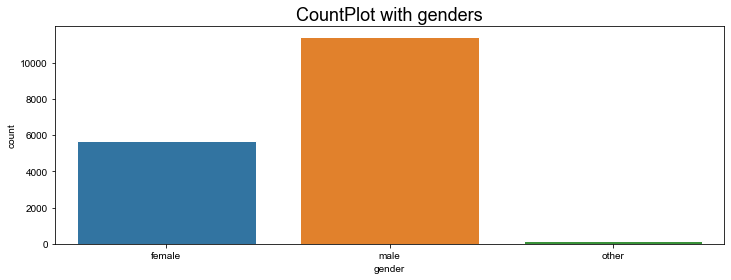

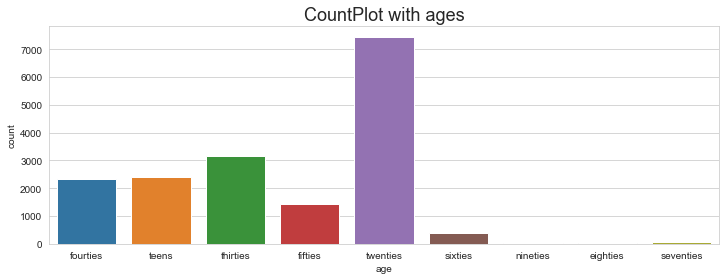

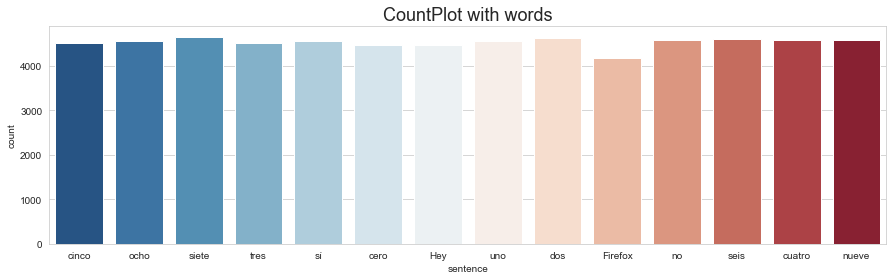

In [2]:
#load tsv in this language
es_dev = pd.read_csv('gender data/es/dev.tsv',sep='	')
es_inval = pd.read_csv('gender data/es/invalidated.tsv',sep='	')
es_other = pd.read_csv('gender data/es/other.tsv',sep='	')
es_reported = pd.read_csv('gender data/es/reported.tsv',sep='	')
es_test = pd.read_csv('gender data/es/test.tsv',sep='	')
es_train = pd.read_csv('gender data/es/train.tsv',sep='	')
es_val = pd.read_csv('gender data/es/validated.tsv',sep='	')

#keep the attributes that we need
es_dev=es_dev[['path','sentence','age','gender','locale']]
es_inval=es_dev[['path','sentence','age','gender','locale']]
es_other=es_other[['path','sentence','age','gender','locale']]
es_test=es_test[['path','sentence','age','gender','locale']]
es_train=es_train[['path','sentence','age','gender','locale']]
es_val=es_val[['path','sentence','age','gender','locale']]

#concatenation
es_concat=pd.concat([es_dev, es_inval, es_other, es_test, es_train, es_val]).drop_duplicates()

#70.038 are all the voice records - 63.496 our instances
print('Counter for values of gender:')
allLanguagesGenderCount['es'] =es_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
es_concat.index=range(len(es_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['gender'],data=es_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['age'],data=es_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=es_concat['sentence'],data=es_concat,palette='RdBu_r');

In [3]:
#Create list with names of mp3 files
mp3_list = os.listdir('gender data/es/clips/') 

#create directory for new wav clips 
os.mkdir('gender data/es/new_clips')

#convert files to .wav - take about 4 hours to run 
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = "gender data/es/clips/" + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = "gender data/es/new_clips/" + string[:-4] + '.wav'
    sound.export(dst, format="wav")

In [4]:
#change suffixes 
es_concat.path=es_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
es_concat.isnull().sum()

path            0
sentence        0
age         46225
gender      46242
locale          0
dtype: int64

In [5]:
#drop nan values
es=es_concat.dropna()

#fix dataframe index
es.index=range(len(es))
es

path sentence       age  gender locale
0      common_voice_es_22031610.wav   cuatro  fourties  female     es
1      common_voice_es_22031616.wav      uno  fourties  female     es
2      common_voice_es_22031617.wav    cinco  fourties  female     es
3      common_voice_es_22031620.wav    nueve  fourties  female     es
4      common_voice_es_22031623.wav      Hey  fourties  female     es
...                             ...      ...       ...     ...    ...
17156  common_voice_es_21956161.wav      uno  fourties  female     es
17157  common_voice_es_21956220.wav       sí  fourties  female     es
17158  common_voice_es_21956221.wav    cinco  fourties  female     es
17159  common_voice_es_21956222.wav     ocho  fourties  female     es
17160  common_voice_es_21956223.wav    siete  fourties  female     es

[17161 rows x 5 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder

#drop from 'gender' attribute values 'other' , because there are not many
es=es[(es!='other').all(1)]
#fix dataframe index
es.index=range(len(es))

#es=pd.get_dummies(es,columns=['gender'])
# integer encode - tranform gender to numeric attribute
label_encoder = LabelEncoder()
es.gender = label_encoder.fit_transform(es.gender)

#add all path in 'path' attribute
es['path'] = 'gender data/es/new_clips/' + es['path']
es

path sentence       age  \
0      gender data/es/new_clips/common_voice_es_22031...   cuatro  fourties   
1      gender data/es/new_clips/common_voice_es_22031...      uno  fourties   
2      gender data/es/new_clips/common_voice_es_22031...    cinco  fourties   
3      gender data/es/new_clips/common_voice_es_22031...    nueve  fourties   
4      gender data/es/new_clips/common_voice_es_22031...      Hey  fourties   
...                                                  ...      ...       ...   
16993  gender data/es/new_clips/common_voice_es_21956...      uno  fourties   
16994  gender data/es/new_clips/common_voice_es_21956...       sí  fourties   
16995  gender data/es/new_clips/common_voice_es_21956...    cinco  fourties   
16996  gender data/es/new_clips/common_voice_es_21956...     ocho  fourties   
16997  gender data/es/new_clips/common_voice_es_21956...    siete  fourties   

       gender locale  
0           0     es  
1           0     es  
2           0     es  
3           0     es  
4           0     es  
...       ...    ...  
16993       0     es  
16994       0     es  
16995       0     es  
16996       0     es  
16997       0     es  

[16998 rows x 5 columns]

In [7]:
#Example of audio file
import librosa
import librosa.display

#path name
fname = es.path[1]

#x is a time series and sr is a sampling rate of x(default sr = 22kHz)
x , sr = librosa.load(fname,sr=48000)

# Lets play the audio 
ipd.Audio(fname)

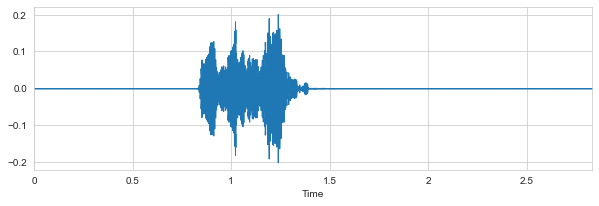

In [8]:
#display waveplot
plt.figure(figsize=(10, 3))
librosa.display.waveplot(x, sr=sr);

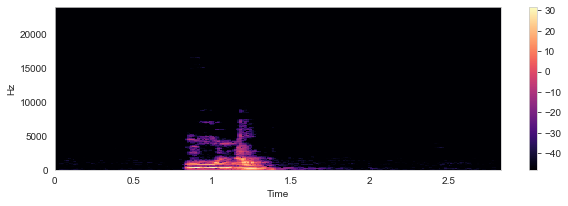

In [9]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(10, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

#plt.savefig('Spectrogram')

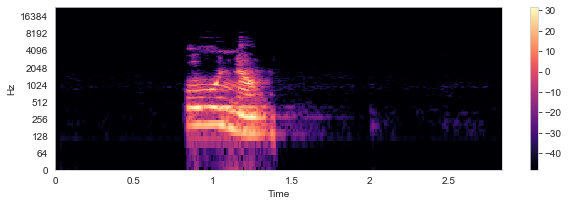

In [10]:
#print log of frequencies  
plt.figure(figsize=(10, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

In [15]:
# Example 1: short-term feature extraction
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import plotly.graph_objs as go 
import IPython 

#read audio data from file (returns sampling freq and signal as a numpy array)
fs, s = aIO.read_audio_file(fname)

# play the initial and the generated files in notebook:
print('Play file:\n')
IPython.display.display(IPython.display.Audio(fname))

# print duration in seconds:
duration = len(s) / float(fs)
print(f'Duration : {duration} seconds\n')

# extract short-term features using a 50msec non-overlapping windows
win, step = 0.1, 0.1
f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
print(f'The file has: {f.shape[1]} frames, {f.shape[0]} short-term features\n')
df = pd.DataFrame(f).transpose()
df.columns = fn
df

Play file:



Duration : 2.832 seconds

The file has: 28 frames, 68 short-term features



zcr        energy  energy_entropy  spectral_centroid  \
0   0.063763  4.172487e-08        2.893965           0.214173   
1   0.109606  4.615247e-08        3.183241           0.238267   
2   0.095645  3.135319e-08        3.279351           0.250149   
3   0.086476  3.058992e-08        3.305470           0.248643   
4   0.107314  3.254372e-08        3.301512           0.251848   
5   0.096895  3.868584e-08        3.284459           0.246816   
6   0.105022  3.438263e-08        3.282566           0.249773   
7   0.106689  3.765590e-08        3.277169           0.249119   
8   0.034591  3.031118e-02        2.321792           0.053571   
9   0.020629  4.068369e-02        2.899036           0.074213   
10  0.022088  5.602446e-02        3.137879           0.053872   
11  0.024172  5.629535e-02        3.008475           0.076158   
12  0.023963  7.227222e-02        2.963019           0.082224   
13  0.012294  1.820632e-03        2.642882           0.073874   
14  0.014170  7.920870e-06        3.183242           0.083408   
15  0.024172  1.441665e-06        3.081757           0.122176   
16  0.029173  6.005274e-07        3.290755           0.154077   
17  0.086893  1.362881e-07        3.174964           0.195717   
18  0.103146  8.832729e-08        3.221498           0.209090   
19  0.097937  2.961196e-08        3.245665           0.250064   
20  0.048135  2.880913e-07        2.473250           0.180773   
21  0.086893  3.999765e-08        3.219116           0.237312   
22  0.091269  3.238497e-08        3.269588           0.248956   
23  0.095437  3.755809e-08        3.304679           0.241261   
24  0.083767  7.628479e-08        3.150312           0.217156   
25  0.069806  6.841636e-08        3.259549           0.215835   
26  0.074807  5.826906e-08        3.279357           0.227101   
27  0.092311  3.598813e-08        3.283428           0.243990   

    spectral_spread  spectral_entropy  spectral_flux  spectral_rolloff  \
0          0.238687          0.988578       0.000000          0.175417   
1          0.253674          1.020573       0.000714          0.193750   
2          0.260010          1.064692       0.000765          0.210000   
3          0.261850          1.180207       0.000605          0.191667   
4          0.263826          1.167964       0.000498          0.197500   
5          0.263715          0.964095       0.000707          0.175833   
6          0.261646          1.145649       0.000610          0.214583   
7          0.260581          1.089953       0.000510          0.209167   
8          0.120202          0.015208       0.024160          0.018750   
9          0.160050          0.012108       0.015215          0.035417   
10         0.107189          0.010412       0.009748          0.045000   
11         0.138519          0.042286       0.014898          0.054583   
12         0.155146          0.014772       0.011054          0.050000   
13         0.166015          0.010098       0.009486          0.017500   
14         0.173238          0.021241       0.007562          0.012500   
15         0.204346          0.094074       0.008177          0.017500   
16         0.222608          0.179394       0.004058          0.021250   
17         0.241290          0.569265       0.002436          0.077500   
18         0.241206          0.791710       0.001010          0.135000   
19         0.263149          1.087892       0.000979          0.205833   
20         0.246249          0.223046       0.004965          0.035417   
21         0.259838          0.950779       0.004558          0.166667   
22         0.266051          0.933584       0.000825          0.170000   
23         0.258653          1.111279       0.000658          0.192500   
24         0.254770          0.860690       0.001030          0.141667   
25         0.255622          0.656057       0.000929          0.095000   
26         0.260177          0.728957       0.000697          0.112083   
27         0.264794          0.962819       0.00079

In [12]:
import plotly
# plot short-term energy
# create time axis in seconds
time = np.arange(0, duration - step, win) 
# get the feature whose name is 'energy'
energy = f[fn.index('energy'), :]
mylayout = go.Layout(yaxis=dict(title="frame energy value"),xaxis=dict(title="time (sec)"))
plotly.offline.iplot(go.Figure(data=[go.Scatter(x=time,y=energy)], layout=mylayout))

In [ ]:
# Example 1: short-term feature extraction
from pyAudioAnalysis import ShortTermFeatures as aF
from pyAudioAnalysis import audioBasicIO as aIO 
import IPython

#create y for our goal
y=es.drop(['sentence','age','locale'],axis=1)

#loop feature extraction over the entire dataset
for i in y.path:
    if os.path.exists(i):
        # read audio data from file 
        # (returns sampling freq and signal as a numpy array)
        fs, s = aIO.read_audio_file(i)
        # extract short-term features using a 50msec non-overlapping windows
        win, step = 0.050, 0.050
        f, fn = aF.feature_extraction(s, fs, int(fs * win), int(fs * step))
        df = pd.DataFrame(f).transpose()
        df.columns = fn

In [19]:
es.drop(['sentence','age','locale'],axis=1)

path  gender
0      gender data/es/new_clips/common_voice_es_22031...       0
1      gender data/es/new_clips/common_voice_es_22031...       0
2      gender data/es/new_clips/common_voice_es_22031...       0
3      gender data/es/new_clips/common_voice_es_22031...       0
4      gender data/es/new_clips/common_voice_es_22031...       0
...                                                  ...     ...
16993  gender data/es/new_clips/common_voice_es_21956...       0
16994  gender data/es/new_clips/common_voice_es_21956...       0
16995  gender data/es/new_clips/common_voice_es_21956...       0
16996  gender data/es/new_clips/common_voice_es_21956...       0
16997  gender data/es/new_clips/common_voice_es_21956...       0

[16998 rows x 2 columns]

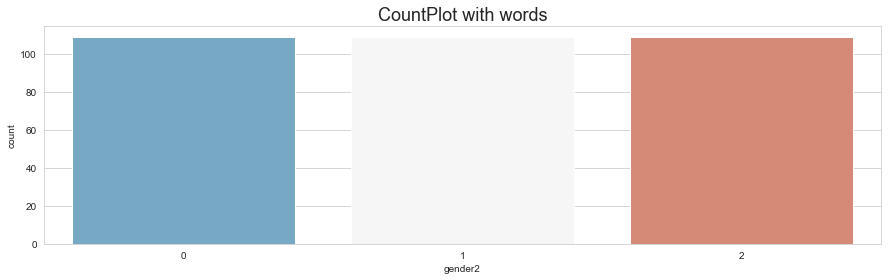

In [41]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)

# transform the dataset
X, y = undersample.fit_resample(X, y)

#plot with count number of words that people say
plt.figure(figsize=(8,2))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=y,palette='RdBu_r');

In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam

#create cnn model #input_shape=(28,28,1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(, activation='relu'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(1, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

SyntaxError: invalid syntax (<ipython-input-20-0652bf612715>, line 15)

## 2.English
<a id="English"></a> 

Counter for values:
           es     en
NaN     46242  27274
male    11423  13485
female   5655   4098
other     176    442


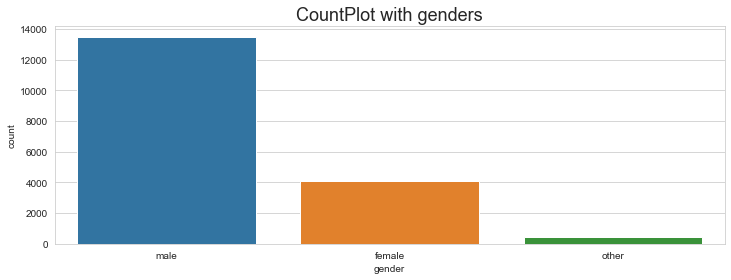

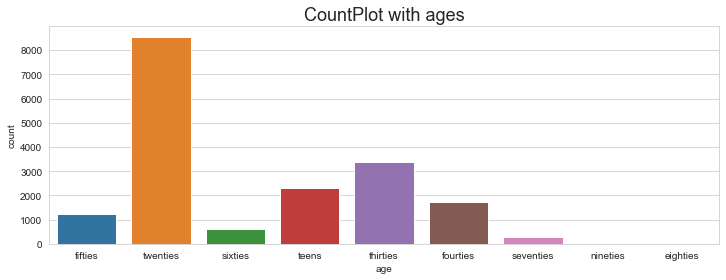

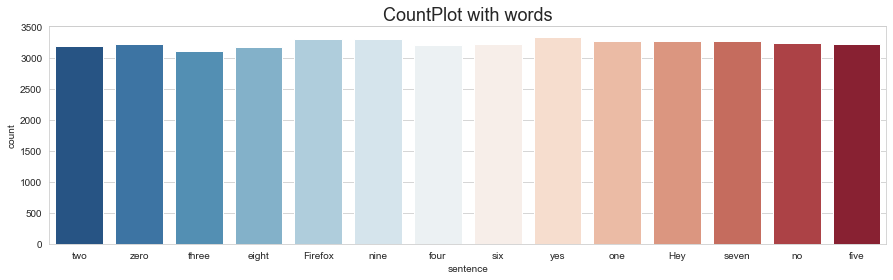

In [7]:
#load tsv in this language
en_dev = pd.read_csv('gender data/en/dev.tsv',sep='	')
en_inval = pd.read_csv('gender data/en/invalidated.tsv',sep='	')
en_other = pd.read_csv('gender data/en/other.tsv',sep='	')
en_reported = pd.read_csv('gender data/en/reported.tsv',sep='	')
en_test = pd.read_csv('gender data/en/test.tsv',sep='	')
en_train = pd.read_csv('gender data/en/train.tsv',sep='	')
en_val = pd.read_csv('gender data/en/validated.tsv',sep='	')

#keep the attributes that we need
en_dev=en_dev[['path','sentence','age','gender','locale']]
en_inval=en_dev[['path','sentence','age','gender','locale']]
en_other=en_other[['path','sentence','age','gender','locale']]
en_test=en_test[['path','sentence','age','gender','locale']]
en_train=en_train[['path','sentence','age','gender','locale']]
en_val=en_val[['path','sentence','age','gender','locale']]

#concatenation of datasets
en_concat=pd.concat([en_dev, en_inval, en_other, en_test, en_train, en_val]).drop_duplicates()

#49.370 are all the voice records - 45.299 our instances
print('Counter for values:')
allLanguagesGenderCount['en'] =en_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
en_concat.index=range(len(en_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['gender'],data=en_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['age'],data=en_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=en_concat['sentence'],data=en_concat,palette='RdBu_r');

In [8]:
#Create list with names of mp3 files
mp3_list = os.listdir('gender data/en/clips/') 

#create directory for new wav clips 
os.mkdir('gender data/en/new_clips')

#convert files to .wav  - take about 3 hours to run
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = "gender data/en/clips/" + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = "gender data/en/new_clips/" + string[:-4] + '.wav'
    sound.export(dst, format="wav")

In [9]:
#change suffixes 
en_concat.path=en_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
en_concat.isnull().sum()

path            0
sentence        0
age         27200
gender      27274
locale          0
dtype: int64

In [11]:
#drop nan values
en=en_concat.dropna()

#fix dataframe index
en.index=range(len(en))
en

path sentence      age  gender locale
0      common_voice_en_22173837.wav      two  fifties    male     en
1      common_voice_en_22173838.wav      one  fifties    male     en
2      common_voice_en_22173839.wav      six  fifties    male     en
3      common_voice_en_22173840.wav     nine  fifties    male     en
4      common_voice_en_22173841.wav     zero  fifties    male     en
...                             ...      ...      ...     ...    ...
17818  common_voice_en_21928717.wav     nine    teens  female     en
17819  common_voice_en_21928723.wav     four    teens  female     en
17820  common_voice_en_21928724.wav    three    teens  female     en
17821  common_voice_en_21928725.wav      two    teens  female     en
17822  common_voice_en_21928726.wav     zero    teens  female     en

[17823 rows x 5 columns]

In [13]:
#drop from 'gender' attribute values 'other' , because there are not many
en=en[(en!='other').all(1)]
#fix dataframe index
en.index=range(len(en))

#en=pd.get_dummies(en,columns=['gender'])
# integer encode - tranform gender to numeric attribute
en.gender = label_encoder.fit_transform(en.gender)

#add all path in 'path' attribute
en['path'] = 'gender data/en/new_clips/' + en['path']
en

path sentence      age  \
0      gender data/en/new_clips/common_voice_en_22173...      two  fifties   
1      gender data/en/new_clips/common_voice_en_22173...      one  fifties   
2      gender data/en/new_clips/common_voice_en_22173...      six  fifties   
3      gender data/en/new_clips/common_voice_en_22173...     nine  fifties   
4      gender data/en/new_clips/common_voice_en_22173...     zero  fifties   
...                                                  ...      ...      ...   
17390  gender data/en/new_clips/common_voice_en_21928...     nine    teens   
17391  gender data/en/new_clips/common_voice_en_21928...     four    teens   
17392  gender data/en/new_clips/common_voice_en_21928...    three    teens   
17393  gender data/en/new_clips/common_voice_en_21928...      two    teens   
17394  gender data/en/new_clips/common_voice_en_21928...     zero    teens   

       gender locale  
0           1     en  
1           1     en  
2           1     en  
3           1     en  
4           1     en  
...       ...    ...  
17390       0     en  
17391       0     en  
17392       0     en  
17393       0     en  
17394       0     en  

[17395 rows x 5 columns]

## 3.French
<a id="French"></a> 

Counter for values:
           es     en     fr
NaN     46242  27274  13723
male    11423  13485   4952
female   5655   4098   1231
other     176    442    131


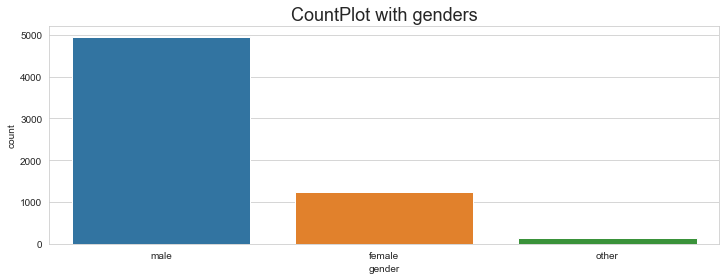

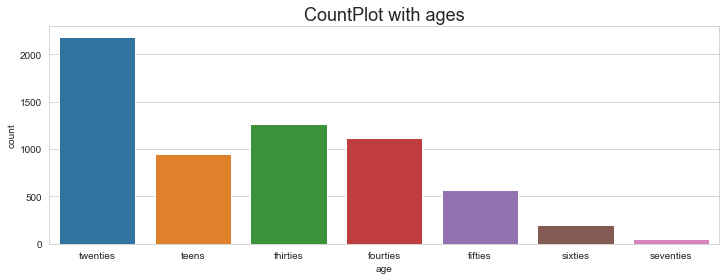

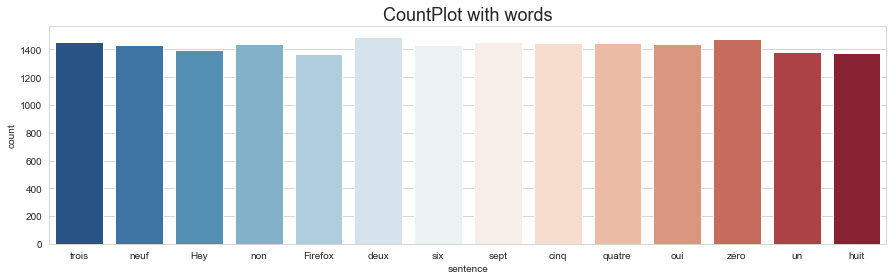

In [14]:
#load tsv in this language
fr_dev = pd.read_csv('gender data/fr/dev.tsv',sep='	')
fr_inval = pd.read_csv('gender data/fr/invalidated.tsv',sep='	')
fr_other = pd.read_csv('gender data/fr/other.tsv',sep='	')
fr_reported = pd.read_csv('gender data/fr/reported.tsv',sep='	')
fr_test = pd.read_csv('gender data/fr/test.tsv',sep='	')
fr_train = pd.read_csv('gender data/fr/train.tsv',sep='	')
fr_val = pd.read_csv('gender data/fr/validated.tsv',sep='	')

#keep the attributes that we need
fr_dev=fr_dev[['path','sentence','age','gender','locale']]
fr_inval=fr_dev[['path','sentence','age','gender','locale']]
fr_other=fr_other[['path','sentence','age','gender','locale']]
fr_test=fr_test[['path','sentence','age','gender','locale']]
fr_train=fr_train[['path','sentence','age','gender','locale']]
fr_val=fr_val[['path','sentence','age','gender','locale']]

#concatenation
fr_concat=pd.concat([fr_dev, fr_inval, fr_other, fr_test, fr_train, fr_val]).drop_duplicates()

#22.382 are all the voice records - 20.037 our instances
print('Counter for values:')
allLanguagesGenderCount['fr'] =fr_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
fr_concat.index=range(len(fr_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['gender'],data=fr_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['age'],data=fr_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fr_concat['sentence'],data=fr_concat,palette='RdBu_r');

In [16]:
#Create list with names of mp3 files
mp3_list = os.listdir('gender data/fr/clips/') 

#create directory for new wav clips 
os.mkdir('gender data/fr/new_clips')

#convert files to .wav  - take about 1 hour to run
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = "gender data/fr/clips/" + string
    sound = AudioSegment.from_mp3(file)

    #convert files
    dst = "gender data/fr/new_clips/" + string[:-4] + '.wav'
    sound.export(dst, format="wav")

In [17]:
#change suffixes 
fr_concat.path=fr_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
fr_concat.isnull().sum()

path            0
sentence        0
age         13704
gender      13723
locale          0
dtype: int64

In [18]:
#drop nan values
fr=fr_concat.dropna()

#fix dataframe index
fr.index=range(len(fr))
fr

path sentence       age gender locale
0     common_voice_fr_22024061.wav    trois  twenties   male     fr
1     common_voice_fr_22024062.wav     neuf  twenties   male     fr
2     common_voice_fr_22024064.wav      Hey  twenties   male     fr
3     common_voice_fr_22024073.wav      non  twenties   male     fr
4     common_voice_fr_22024074.wav  Firefox  twenties   male     fr
...                            ...      ...       ...    ...    ...
6286  common_voice_fr_22380530.wav   quatre     teens   male     fr
6287  common_voice_fr_22380532.wav      oui     teens   male     fr
6288  common_voice_fr_22380533.wav     deux     teens   male     fr
6289  common_voice_fr_22380534.wav  Firefox     teens   male     fr
6290  common_voice_fr_22380535.wav     huit     teens   male     fr

[6291 rows x 5 columns]

In [19]:
#drop from 'gender' attribute values 'other' , because there are not many
fr=fr[(fr!='other').all(1)]
#fix dataframe index
fr.index=range(len(fr))

#fr=pd.get_dummies(fr,columns=['gender'])
# integer encode - tranform gender to numeric attribute
fr.gender = label_encoder.fit_transform(fr.gender)

#add all path in 'path' attribute
fr['path'] = 'gender data/fr/new_clips/' + fr['path']
fr

path sentence       age  \
0     gender data/fr/new_clips/common_voice_fr_22024...    trois  twenties   
1     gender data/fr/new_clips/common_voice_fr_22024...     neuf  twenties   
2     gender data/fr/new_clips/common_voice_fr_22024...      Hey  twenties   
3     gender data/fr/new_clips/common_voice_fr_22024...      non  twenties   
4     gender data/fr/new_clips/common_voice_fr_22024...  Firefox  twenties   
...                                                 ...      ...       ...   
6155  gender data/fr/new_clips/common_voice_fr_22380...   quatre     teens   
6156  gender data/fr/new_clips/common_voice_fr_22380...      oui     teens   
6157  gender data/fr/new_clips/common_voice_fr_22380...     deux     teens   
6158  gender data/fr/new_clips/common_voice_fr_22380...  Firefox     teens   
6159  gender data/fr/new_clips/common_voice_fr_22380...     huit     teens   

      gender locale  
0          1     fr  
1          1     fr  
2          1     fr  
3          1     fr  
4          1     fr  
...      ...    ...  
6155       1     fr  
6156       1     fr  
6157       1     fr  
6158       1     fr  
6159       1     fr  

[6160 rows x 5 columns]

## 4.German
<a id="German"></a> 

Counter for values:
           es     en     fr    de
NaN     46242  27274  13723  8513
male    11423  13485   4952  4345
female   5655   4098   1231   802
other     176    442    131    44


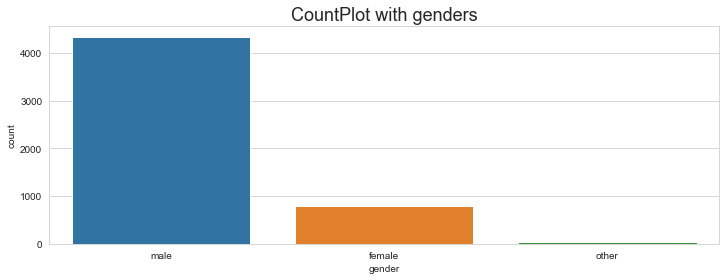

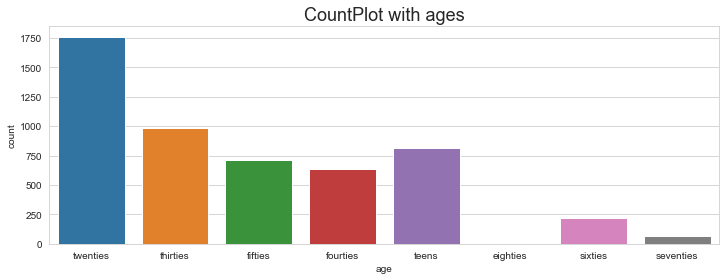

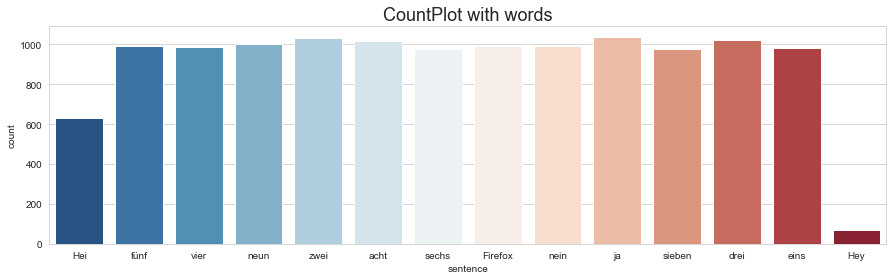

In [20]:
#load tsv in this language
de_dev = pd.read_csv('gender data/de/dev.tsv',sep='	')
de_inval = pd.read_csv('gender data/de/invalidated.tsv',sep='	')
de_other = pd.read_csv('gender data/de/other.tsv',sep='	')
de_reported = pd.read_csv('gender data/de/reported.tsv',sep='	')
de_test = pd.read_csv('gender data/de/test.tsv',sep='	')
de_train = pd.read_csv('gender data/de/train.tsv',sep='	')
de_val = pd.read_csv('gender data/de/validated.tsv',sep='	')

#keep the attributes that we need
de_dev=de_dev[['path','sentence','age','gender','locale']]
de_inval=de_dev[['path','sentence','age','gender','locale']]
de_other=de_other[['path','sentence','age','gender','locale']]
de_test=de_test[['path','sentence','age','gender','locale']]
de_train=de_train[['path','sentence','age','gender','locale']]
de_val=de_val[['path','sentence','age','gender','locale']]

#concatenation
de_concat=pd.concat([de_dev, de_inval, de_other, de_test, de_train, de_val]).drop_duplicates()

#15.090 are all the voice records - 13.704 our instances
print('Counter for values:')
allLanguagesGenderCount['de'] =de_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(de_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['gender'],data=de_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['age'],data=de_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=de_concat['sentence'],data=de_concat,palette='RdBu_r');

In [21]:
#Create list with names of mp3 files
mp3_list = os.listdir('gender data/de/clips/') 

#create directory for new wav clips 
os.mkdir('gender data/de/new_clips')

#convert files to .wav - take about 1 hour to run
for string in mp3_list:
    
    #go to source to convert mp3 files to wave files
    file = "gender data/de/clips/" + string
    sound = AudioSegment.from_mp3(file)
    
    #convert files
    dst = "gender data/de/new_clips/" + string[:-4] + '.wav'
    sound.export(dst, format="wav")

In [22]:
#change suffixes 
de_concat.path=de_concat.path.str.replace('.mp3','.wav')

#sumarize nan values in each attribute
de_concat.isnull().sum()

path           0
sentence     979
age         8498
gender      8513
locale         0
dtype: int64

In [23]:
#drop nan values
de=de_concat.dropna()

#fix dataframe index
de.index=range(len(de))
de

path sentence       age gender locale
0     common_voice_de_21897363.wav  Firefox  twenties   male     de
1     common_voice_de_21897364.wav     acht  twenties   male     de
2     common_voice_de_21897365.wav     nein  twenties   male     de
3     common_voice_de_21897366.wav       ja  twenties   male     de
4     common_voice_de_21897367.wav     vier  twenties   male     de
...                            ...      ...       ...    ...    ...
4787  common_voice_de_21916843.wav     vier   fifties   male     de
4788  common_voice_de_21916844.wav     zwei   fifties   male     de
4789  common_voice_de_21916845.wav   sieben   fifties   male     de
4790  common_voice_de_21916846.wav      Hei   fifties   male     de
4791  common_voice_de_23887746.wav      Hey   fifties   male     de

[4792 rows x 5 columns]

In [24]:
#drop from 'gender' attribute values 'other' , because there are not many
de=de[(de!='other').all(1)]
#fix dataframe index
de.index=range(len(de))

#de=pd.get_dummies(de,columns=['gender'])
# integer encode - tranform gender to numeric attribute
de.gender = label_encoder.fit_transform(de.gender)

#add all path in path attribute
de['path'] = 'gender data/de/new_clips/' + de['path']
de

path sentence       age  \
0     gender data/de/new_clips/common_voice_de_21897...  Firefox  twenties   
1     gender data/de/new_clips/common_voice_de_21897...     acht  twenties   
2     gender data/de/new_clips/common_voice_de_21897...     nein  twenties   
3     gender data/de/new_clips/common_voice_de_21897...       ja  twenties   
4     gender data/de/new_clips/common_voice_de_21897...     vier  twenties   
...                                                 ...      ...       ...   
4746  gender data/de/new_clips/common_voice_de_21916...     vier   fifties   
4747  gender data/de/new_clips/common_voice_de_21916...     zwei   fifties   
4748  gender data/de/new_clips/common_voice_de_21916...   sieben   fifties   
4749  gender data/de/new_clips/common_voice_de_21916...      Hei   fifties   
4750  gender data/de/new_clips/common_voice_de_23887...      Hey   fifties   

      gender locale  
0          1     de  
1          1     de  
2          1     de  
3          1     de  
4          1     de  
...      ...    ...  
4746       1     de  
4747       1     de  
4748       1     de  
4749       1     de  
4750       1     de  

[4751 rows x 5 columns]

## 5.Catalan
<a id="Catalan"></a> 

Counter for values:
           es     en     fr    de    ca
NaN     46242  27274  13723  8513  2087
male    11423  13485   4952  4345  1384
female   5655   4098   1231   802   479
other     176    442    131    44    13


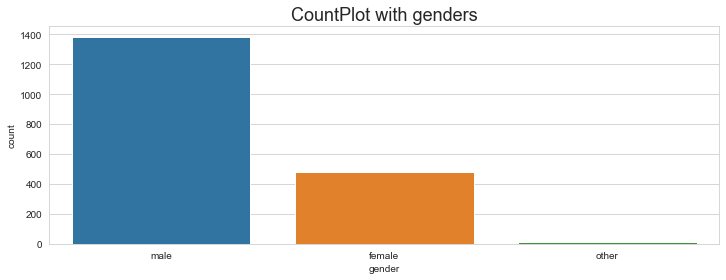

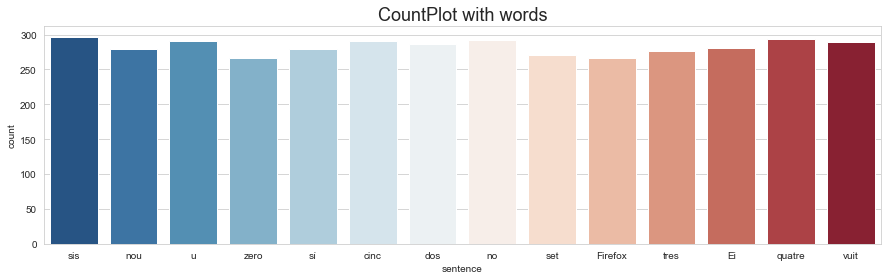

In [7]:
#load tsv in this language
ca_dev = pd.read_csv('gender data/ca/dev.tsv',sep='	')
ca_inval = pd.read_csv('gender data/ca/invalidated.tsv',sep='	')
ca_other = pd.read_csv('gender data/ca/other.tsv',sep='	')
ca_reported = pd.read_csv('gender data/ca/reported.tsv',sep='	')
ca_test = pd.read_csv('gender data/ca/test.tsv',sep='	')
ca_train = pd.read_csv('gender data/ca/train.tsv',sep='	')
ca_val = pd.read_csv('gender data/ca/validated.tsv',sep='	')

#keep the attributes that we need
ca_dev=ca_dev[['path','sentence','age','gender','locale']]
ca_inval=ca_dev[['path','sentence','age','gender','locale']]
ca_other=ca_other[['path','sentence','age','gender','locale']]
ca_test=ca_test[['path','sentence','age','gender','locale']]
ca_train=ca_train[['path','sentence','age','gender','locale']]
ca_val=ca_val[['path','sentence','age','gender','locale']]

#concatenation
ca_concat=pd.concat([ca_dev, ca_inval, ca_other, ca_test, ca_train, ca_val]).drop_duplicates()

#fix dataframe index
de_concat.index=range(len(ca_concat))

#4.180 are all the voice records - 3.963 our instances
print('Counter for values:')
allLanguagesGenderCount['ca'] =ca_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ca_concat['gender'],data=ca_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ca_concat['age'],data=ca_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ca_concat['sentence'],data=ca_concat,palette='RdBu_r');

## 6.Russian
<a id="Russian"></a> 

Counter for values:
           es     en     fr    de    ca   ru
NaN     46242  27274  13723  8513  2087  979
male    11423  13485   4952  4345  1384  976
female   5655   4098   1231   802   479  122
other     176    442    131    44    13   14


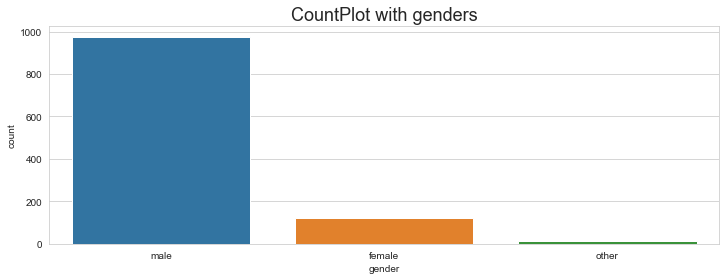

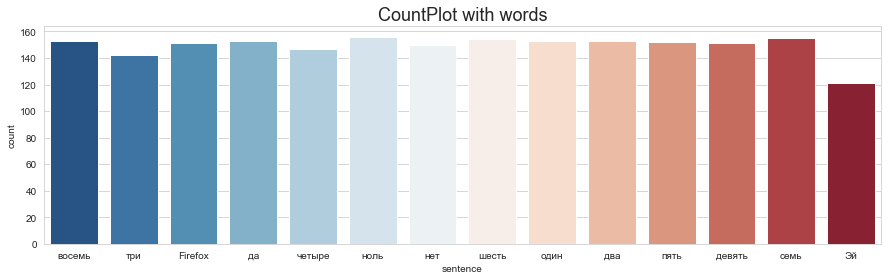

In [8]:
#load tsv in this language
ru_dev = pd.read_csv('gender data/ru/dev.tsv',sep='	')
ru_inval = pd.read_csv('gender data/ru/invalidated.tsv',sep='	')
ru_other = pd.read_csv('gender data/ru/other.tsv',sep='	')
ru_reported = pd.read_csv('gender data/ru/reported.tsv',sep='	')
ru_test = pd.read_csv('gender data/ru/test.tsv',sep='	')
ru_train = pd.read_csv('gender data/ru/train.tsv',sep='	')
ru_val = pd.read_csv('gender data/ru/validated.tsv',sep='	')

#keep the attributes that we need
ru_dev=ru_dev[['path','sentence','age','gender','locale']]
ru_inval=ru_dev[['path','sentence','age','gender','locale']]
ru_other=ru_other[['path','sentence','age','gender','locale']]
ru_test=ru_test[['path','sentence','age','gender','locale']]
ru_train=ru_train[['path','sentence','age','gender','locale']]
ru_val=ru_val[['path','sentence','age','gender','locale']]

#concatenation
ru_concat=pd.concat([ru_dev, ru_inval, ru_other, ru_test, ru_train, ru_val]).drop_duplicates()

#2.195 are all the voice records - 2.091 our instances
print('Counter for values:')
allLanguagesGenderCount['ru'] =ru_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(ru_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ru_concat['gender'],data=ru_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ru_concat['age'],data=ru_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ru_concat['sentence'],data=ru_concat,palette='RdBu_r');

## 7.Portuguese
<a id="Portuguese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt
NaN     46242  27274  13723  8513  2087  979  464
male    11423  13485   4952  4345  1384  976  678
female   5655   4098   1231   802   479  122   66
other     176    442    131    44    13   14   12


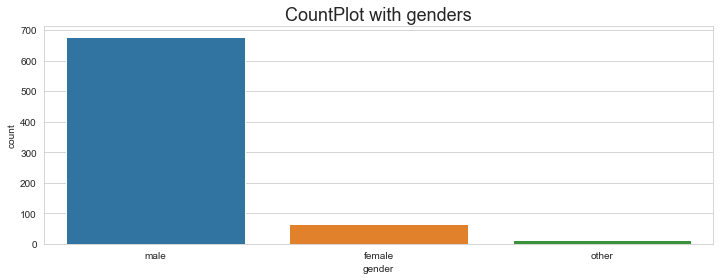

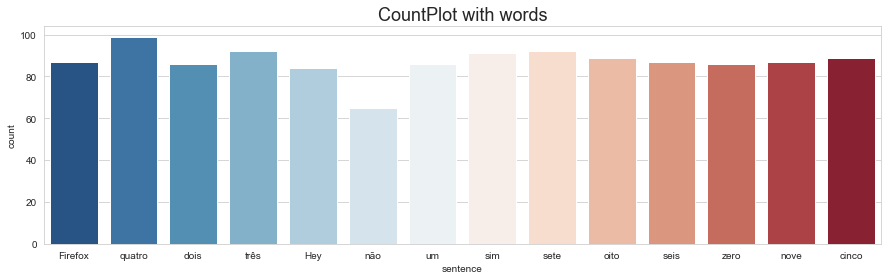

In [9]:
#load tsv in this language
pt_dev = pd.read_csv('gender data/pt/dev.tsv',sep='	')
pt_inval = pd.read_csv('gender data/pt/invalidated.tsv',sep='	')
pt_other = pd.read_csv('gender data/pt/other.tsv',sep='	')
pt_reported = pd.read_csv('gender data/pt/reported.tsv',sep='	')
pt_test = pd.read_csv('gender data/pt/test.tsv',sep='	')
pt_train = pd.read_csv('gender data/pt/train.tsv',sep='	')
pt_val = pd.read_csv('gender data/pt/validated.tsv',sep='	')

#keep the attributes that we need
pt_dev=pt_dev[['path','sentence','age','gender','locale']]
pt_inval=pt_dev[['path','sentence','age','gender','locale']]
pt_other=pt_other[['path','sentence','age','gender','locale']]
pt_test=pt_test[['path','sentence','age','gender','locale']]
pt_train=pt_train[['path','sentence','age','gender','locale']]
pt_val=pt_val[['path','sentence','age','gender','locale']]

#concatenation
pt_concat=pd.concat([pt_dev, pt_inval, pt_other, pt_test, pt_train, pt_val]).drop_duplicates()

#1.307 are all the voice records - 1.220 our instances
print('Counter for values:')
allLanguagesGenderCount['pt'] =pt_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(pt_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pt_concat['gender'],data=pt_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pt_concat['age'],data=pt_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pt_concat['sentence'],data=pt_concat,palette='RdBu_r');

## 8.Polish
<a id="Polish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl
NaN     46242  27274  13723  8513  2087  979  464  535
male    11423  13485   4952  4345  1384  976  678  453
female   5655   4098   1231   802   479  122   66  147
other     176    442    131    44    13   14   12   10


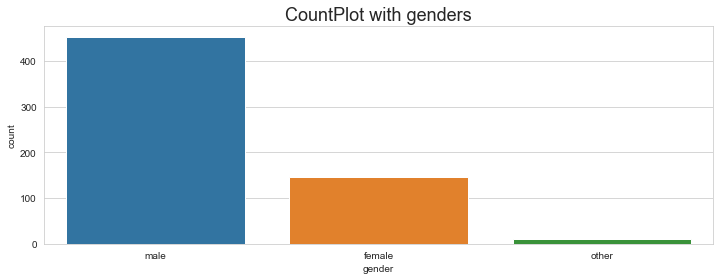

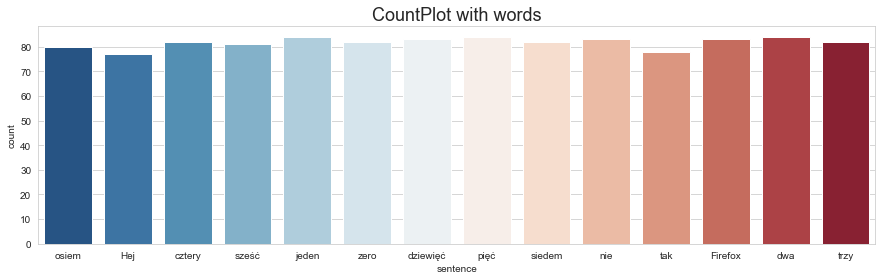

In [10]:
#load tsv in this language
pl_dev = pd.read_csv('gender data/pl/dev.tsv',sep='	')
pl_inval = pd.read_csv('gender data/pl/invalidated.tsv',sep='	')
pl_other = pd.read_csv('gender data/pl/other.tsv',sep='	')
pl_reported = pd.read_csv('gender data/pl/reported.tsv',sep='	')
pl_test = pd.read_csv('gender data/pl/test.tsv',sep='	')
pl_train = pd.read_csv('gender data/pl/train.tsv',sep='	')
pl_val = pd.read_csv('gender data/pl/validated.tsv',sep='	')

#keep the attributes that we need
pl_dev=pl_dev[['path','sentence','age','gender','locale']]
pl_inval=pl_dev[['path','sentence','age','gender','locale']]
pl_other=pl_other[['path','sentence','age','gender','locale']]
pl_test=pl_test[['path','sentence','age','gender','locale']]
pl_train=pl_train[['path','sentence','age','gender','locale']]
pl_val=pl_val[['path','sentence','age','gender','locale']]

#concatenation
pl_concat=pd.concat([pl_dev, pl_inval, pl_other, pl_test, pl_train, pl_val]).drop_duplicates()

#1.182 are all the voice records - 1.145 our instances
print('Counter for values:')
allLanguagesGenderCount['pl'] =pl_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(pl_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pl_concat['gender'],data=pl_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pl_concat['age'],data=pl_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=pl_concat['sentence'],data=pl_concat,palette='RdBu_r');

## 9.Esperanto
<a id="Esperanto"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo
NaN     46242  27274  13723  8513  2087  979  464  535  419
male    11423  13485   4952  4345  1384  976  678  453  450
female   5655   4098   1231   802   479  122   66  147   45
other     176    442    131    44    13   14   12   10   10


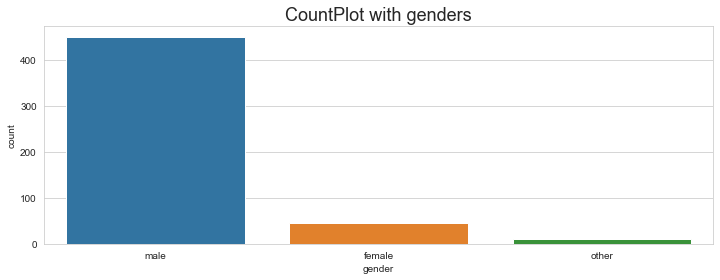

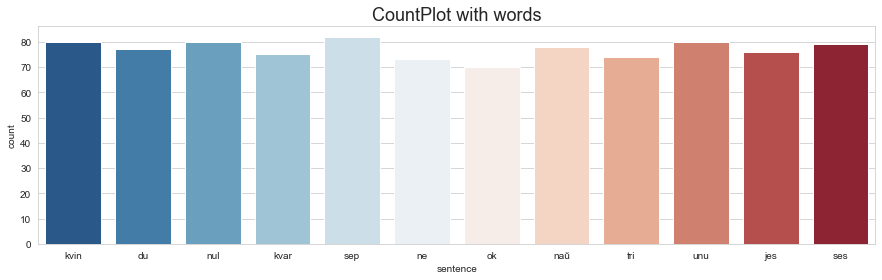

In [11]:
#load tsv in this language
eo_dev = pd.read_csv('gender data/eo/dev.tsv',sep='	')
eo_inval = pd.read_csv('gender data/eo/invalidated.tsv',sep='	')
eo_other = pd.read_csv('gender data/eo/other.tsv',sep='	')
eo_reported = pd.read_csv('gender data/eo/reported.tsv',sep='	')
eo_test = pd.read_csv('gender data/eo/test.tsv',sep='	')
eo_train = pd.read_csv('gender data/eo/train.tsv',sep='	')
eo_val = pd.read_csv('gender data/eo/validated.tsv',sep='	')

#keep the attributes that we need
eo_dev=eo_dev[['path','sentence','age','gender','locale']]
eo_inval=eo_dev[['path','sentence','age','gender','locale']]
eo_other=eo_other[['path','sentence','age','gender','locale']]
eo_test=eo_test[['path','sentence','age','gender','locale']]
eo_train=eo_train[['path','sentence','age','gender','locale']]
eo_val=eo_val[['path','sentence','age','gender','locale']]

#concatenation
eo_concat=pd.concat([eo_dev, eo_inval, eo_other, eo_test, eo_train, eo_val]).drop_duplicates()

#965 are all the voice records - 924 our instances
print('Counter for values:')
allLanguagesGenderCount['eo'] =eo_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(eo_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eo_concat['gender'],data=eo_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eo_concat['age'],data=eo_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eo_concat['sentence'],data=eo_concat,palette='RdBu_r');

## 10.Netherlands/ Dutch
<a id="Dutch"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0
male    11423  13485   4952  4345  1384  976  678  453  450  285.0
female   5655   4098   1231   802   479  122   66  147   45   32.0
other     176    442    131    44    13   14   12   10   10    NaN


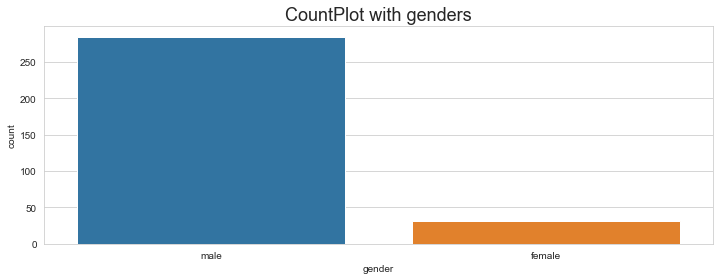

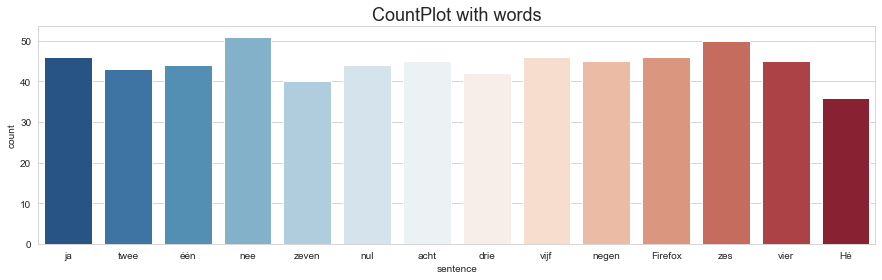

In [12]:
#load tsv in this language
nl_dev = pd.read_csv('gender data/nl/dev.tsv',sep='	')
nl_inval = pd.read_csv('gender data/nl/invalidated.tsv',sep='	')
nl_other = pd.read_csv('gender data/nl/other.tsv',sep='	')
nl_reported = pd.read_csv('gender data/nl/reported.tsv',sep='	')
nl_test = pd.read_csv('gender data/nl/test.tsv',sep='	')
nl_train = pd.read_csv('gender data/nl/train.tsv',sep='	')
nl_val = pd.read_csv('gender data/nl/validated.tsv',sep='	')

#keep the attributes that we need
nl_dev=nl_dev[['path','sentence','age','gender','locale']]
nl_inval=nl_dev[['path','sentence','age','gender','locale']]
nl_other=nl_other[['path','sentence','age','gender','locale']]
nl_test=nl_test[['path','sentence','age','gender','locale']]
nl_train=nl_train[['path','sentence','age','gender','locale']]
nl_val=nl_val[['path','sentence','age','gender','locale']]

#concatenation
nl_concat=pd.concat([nl_dev, nl_inval, nl_other, nl_test, nl_train, nl_val]).drop_duplicates()

#644 are all the voice records - 623 our instances
print('Counter for values:')
allLanguagesGenderCount['nl'] =nl_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(nl_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=nl_concat['gender'],data=nl_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=nl_concat['age'],data=nl_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=nl_concat['sentence'],data=nl_concat,palette='RdBu_r');

## 11.Japanese
<a id="Japanese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266
female   5655   4098   1231   802   479  122   66  147   45   32.0  152
other     176    442    131    44    13   14   12   10   10    NaN    9


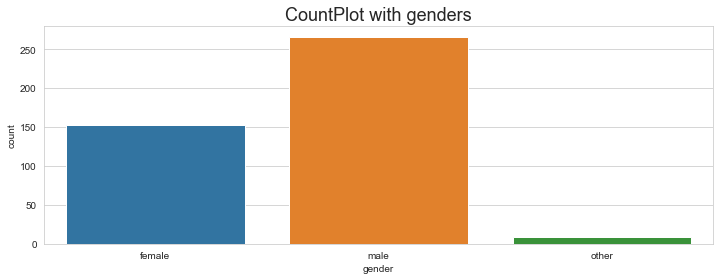

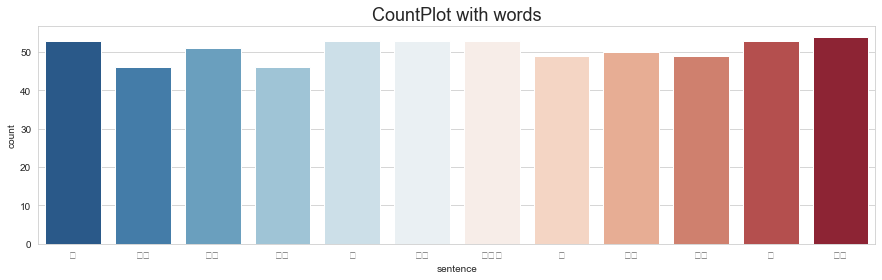

In [13]:
#load tsv in this language
ja_dev = pd.read_csv('gender data/ja/dev.tsv',sep='	')
ja_inval = pd.read_csv('gender data/ja/invalidated.tsv',sep='	')
ja_other = pd.read_csv('gender data/ja/other.tsv',sep='	')
ja_reported = pd.read_csv('gender data/ja/reported.tsv',sep='	')
ja_test = pd.read_csv('gender data/ja/test.tsv',sep='	')
ja_train = pd.read_csv('gender data/ja/train.tsv',sep='	')
ja_val = pd.read_csv('gender data/ja/validated.tsv',sep='	')

#keep the attributes that we need
ja_dev=ja_dev[['path','sentence','age','gender','locale']]
ja_inval=ja_dev[['path','sentence','age','gender','locale']]
ja_other=ja_other[['path','sentence','age','gender','locale']]
ja_test=ja_test[['path','sentence','age','gender','locale']]
ja_train=ja_train[['path','sentence','age','gender','locale']]
ja_val=ja_val[['path','sentence','age','gender','locale']]

#concatenation
ja_concat=pd.concat([ja_dev, ja_inval, ja_other, ja_test, ja_train, ja_val]).drop_duplicates()

#644 are all the voice records - 610 our instances
print('Counter for values:')
allLanguagesGenderCount['ja'] =ja_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(ja_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ja_concat['gender'],data=ja_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ja_concat['age'],data=ja_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ja_concat['sentence'],data=ja_concat,palette='RdBu_r');

## 12.Euskaltzaindia - Basque language
<a id="Euskaltzaindia"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja     eu
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183  460.0
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266  110.0
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   52.0
other     176    442    131    44    13   14   12   10   10    NaN    9    NaN


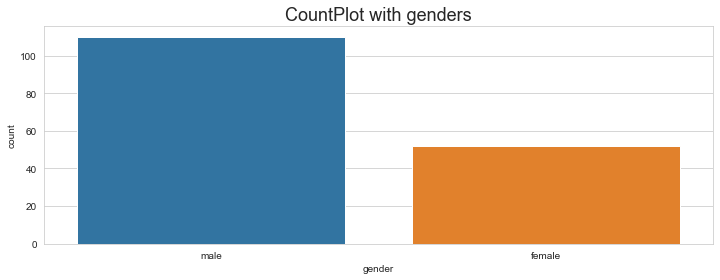

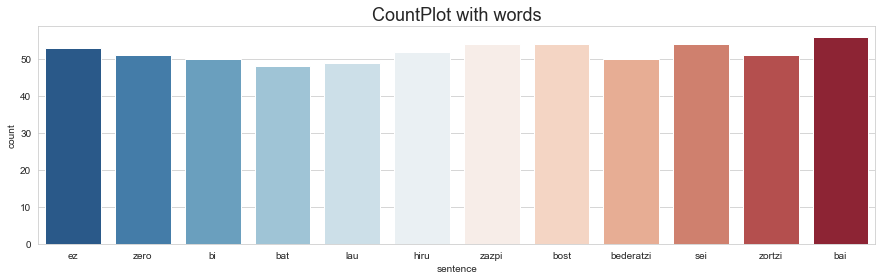

In [14]:
#load tsv in this language
eu_dev = pd.read_csv('gender data/eu/dev.tsv',sep='	')
eu_inval = pd.read_csv('gender data/eu/invalidated.tsv',sep='	')
eu_other = pd.read_csv('gender data/eu/other.tsv',sep='	')
eu_reported = pd.read_csv('gender data/eu/reported.tsv',sep='	')
eu_test = pd.read_csv('gender data/eu/test.tsv',sep='	')
eu_train = pd.read_csv('gender data/eu/train.tsv',sep='	')
eu_val = pd.read_csv('gender data/eu/validated.tsv',sep='	')

#keep the attributes that we need
eu_dev=eu_dev[['path','sentence','age','gender','locale']]
eu_inval=eu_dev[['path','sentence','age','gender','locale']]
eu_other=eu_other[['path','sentence','age','gender','locale']]
eu_test=eu_test[['path','sentence','age','gender','locale']]
eu_train=eu_train[['path','sentence','age','gender','locale']]
eu_val=eu_val[['path','sentence','age','gender','locale']]

#concatenation
eu_concat=pd.concat([eu_dev, eu_inval, eu_other, eu_test, eu_train, eu_val]).drop_duplicates()

#635 are all the voice records - 622 our instances
print('Counter for values:')
allLanguagesGenderCount['eu'] =eu_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#fix dataframe index
de_concat.index=range(len(eu_concat))

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eu_concat['gender'],data=eu_concat);

#plot with ages
plt.figure(figsize=(12,4))
plt.title('CountPlot with ages', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eu_concat['age'],data=eu_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=eu_concat['sentence'],data=eu_concat,palette='RdBu_r');

## 13.Arabic
<a id="Arabic"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar  
NaN     460.0  246.0  
male    110.0  231.0  
female   52.0   42.0  
other     NaN    NaN  


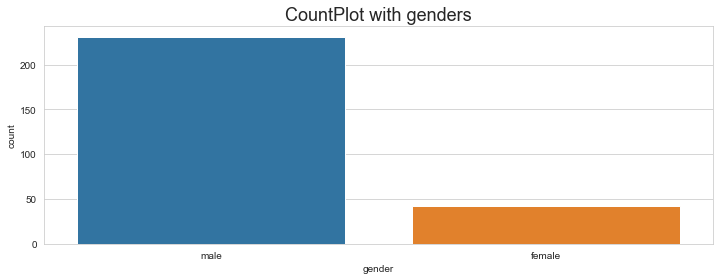

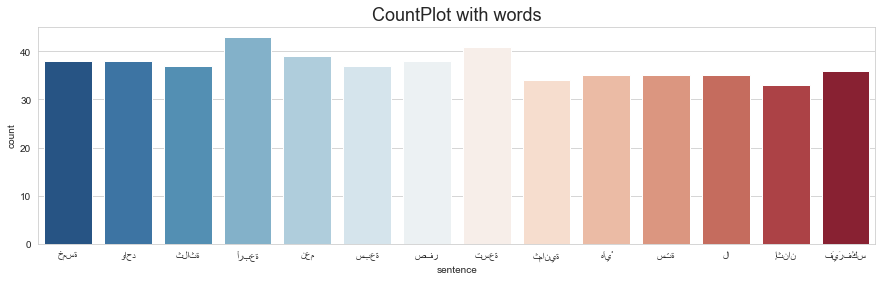

In [15]:
#load tsv in this language
ar_dev = pd.read_csv('gender data/ar/dev.tsv',sep='	')
ar_inval = pd.read_csv('gender data/ar/invalidated.tsv',sep='	')
ar_other = pd.read_csv('gender data/ar/other.tsv',sep='	')
ar_reported = pd.read_csv('gender data/ar/reported.tsv',sep='	')
ar_test = pd.read_csv('gender data/ar/test.tsv',sep='	')
ar_train = pd.read_csv('gender data/ar/train.tsv',sep='	')
ar_val = pd.read_csv('gender data/ar/validated.tsv',sep='	')

#keep the attributes that we need
ar_dev=ar_dev[['path','sentence','age','gender','locale']]
ar_inval=ar_dev[['path','sentence','age','gender','locale']]
ar_other=ar_other[['path','sentence','age','gender','locale']]
ar_test=ar_test[['path','sentence','age','gender','locale']]
ar_train=ar_train[['path','sentence','age','gender','locale']]
ar_val=ar_val[['path','sentence','age','gender','locale']]

#concatenation 
ar_concat=pd.concat([ar_dev, ar_inval, ar_other, ar_test, ar_train, ar_val]).drop_duplicates()

#564 are all the voice records - 519 our instances
print('Counter for values:')
allLanguagesGenderCount['ar'] =ar_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ar_concat['gender'],data=ar_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ar_concat['sentence'],data=ar_concat,palette='RdBu_r');

## 14.Cymraeg - Welsh language
<a id="Cymraeg"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy  
NaN     460.0  246.0  291.0  
male    110.0  231.0  129.0  
female   52.0   42.0  118.0  
other     NaN    NaN    NaN  


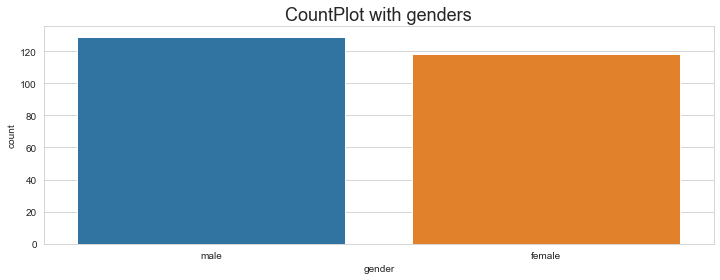

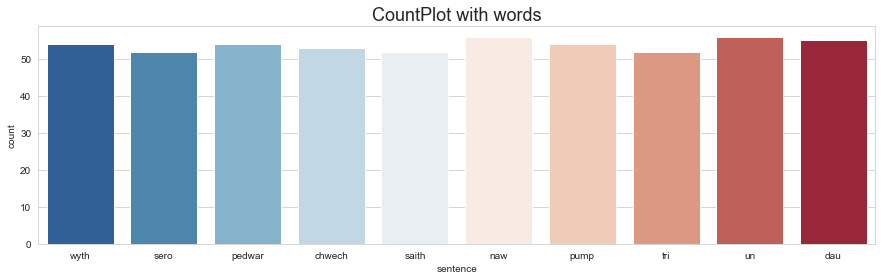

In [16]:
#load tsv in this language
cy_dev = pd.read_csv('gender data/cy/dev.tsv',sep='	')
cy_inval = pd.read_csv('gender data/cy/invalidated.tsv',sep='	')
cy_other = pd.read_csv('gender data/cy/other.tsv',sep='	')
cy_reported = pd.read_csv('gender data/cy/reported.tsv',sep='	')
cy_test = pd.read_csv('gender data/cy/test.tsv',sep='	')
cy_train = pd.read_csv('gender data/cy/train.tsv',sep='	')
cy_val = pd.read_csv('gender data/cy/validated.tsv',sep='	')

#keep the attributes that we need
cy_dev=cy_dev[['path','sentence','age','gender','locale']]
cy_inval=cy_dev[['path','sentence','age','gender','locale']]
cy_other=cy_other[['path','sentence','age','gender','locale']]
cy_test=cy_test[['path','sentence','age','gender','locale']]
cy_train=cy_train[['path','sentence','age','gender','locale']]
cy_val=cy_val[['path','sentence','age','gender','locale']]

#concatenation
cy_concat=pd.concat([cy_dev, cy_inval, cy_other, cy_test, cy_train, cy_val]).drop_duplicates()

#553 are all the voice records - 538 our instances
print('Counter for values:')
allLanguagesGenderCount['cy'] =cy_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cy_concat['gender'],data=cy_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cy_concat['sentence'],data=cy_concat,palette='RdBu_r');

## 15.Czech Republic
<a id="Czech"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs  
NaN     460.0  246.0  291.0  370.0  
male    110.0  231.0  129.0  129.0  
female   52.0   42.0  118.0   29.0  
other     NaN    NaN    NaN    NaN  


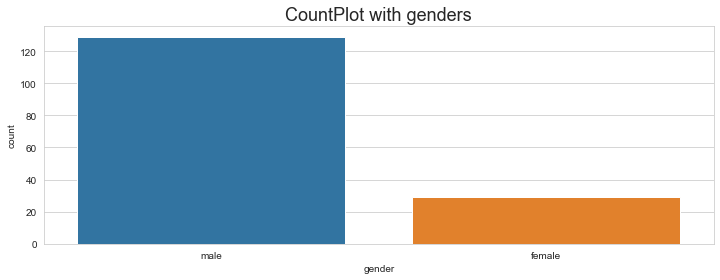

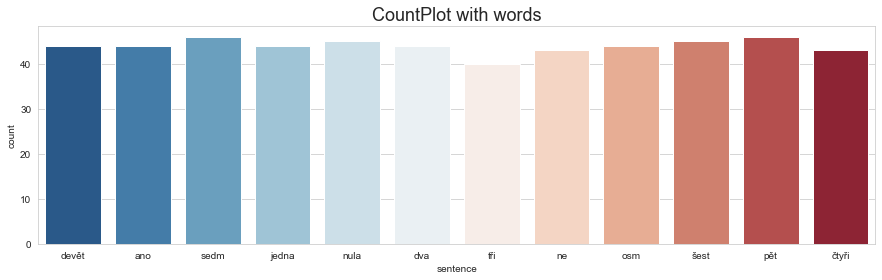

In [17]:
#load tsv in this language
cs_dev = pd.read_csv('gender data/cs/dev.tsv',sep='	')
cs_inval = pd.read_csv('gender data/cs/invalidated.tsv',sep='	')
cs_other = pd.read_csv('gender data/cs/other.tsv',sep='	')
cs_reported = pd.read_csv('gender data/cs/reported.tsv',sep='	')
cs_test = pd.read_csv('gender data/cs/test.tsv',sep='	')
cs_train = pd.read_csv('gender data/cs/train.tsv',sep='	')
cs_val = pd.read_csv('gender data/cs/validated.tsv',sep='	')

#keep the attributes that we need
cs_dev=cs_dev[['path','sentence','age','gender','locale']]
cs_inval=cs_dev[['path','sentence','age','gender','locale']]
cs_other=cs_other[['path','sentence','age','gender','locale']]
cs_test=cs_test[['path','sentence','age','gender','locale']]
cs_train=cs_train[['path','sentence','age','gender','locale']]
cs_val=cs_val[['path','sentence','age','gender','locale']]

#concatenation
cs_concat=pd.concat([cs_dev, cs_inval, cs_other, cs_test, cs_train, cs_val]).drop_duplicates()

#542 are all the voice records - 528 our instances
print('Counter for values:')
allLanguagesGenderCount['cs'] =cs_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cs_concat['gender'],data=cs_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cs_concat['sentence'],data=cs_concat,palette='RdBu_r');

## 16.Turkish
<a id="Turkish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr  
NaN     460.0  246.0  291.0  370.0  240.0  
male    110.0  231.0  129.0  129.0  225.0  
female   52.0   42.0  118.0   29.0   26.0  
other     NaN    NaN    NaN    NaN    NaN  


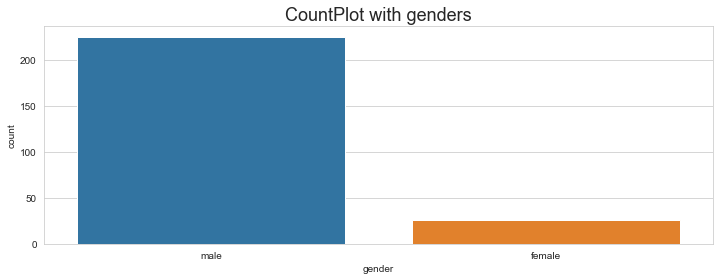

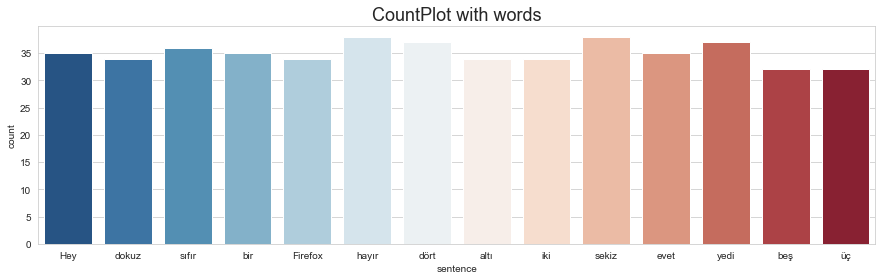

In [18]:
#load tsv in this language
tr_dev = pd.read_csv('gender data/tr/dev.tsv',sep='	')
tr_inval = pd.read_csv('gender data/tr/invalidated.tsv',sep='	')
tr_other = pd.read_csv('gender data/tr/other.tsv',sep='	')
tr_reported = pd.read_csv('gender data/tr/reported.tsv',sep='	')
tr_test = pd.read_csv('gender data/tr/test.tsv',sep='	')
tr_train = pd.read_csv('gender data/tr/train.tsv',sep='	')
tr_val = pd.read_csv('gender data/tr/validated.tsv',sep='	')

#keep the attributes that we need
tr_dev=tr_dev[['path','sentence','age','gender','locale']]
tr_inval=tr_dev[['path','sentence','age','gender','locale']]
tr_other=tr_other[['path','sentence','age','gender','locale']]
tr_test=tr_test[['path','sentence','age','gender','locale']]
tr_train=tr_train[['path','sentence','age','gender','locale']]
tr_val=tr_val[['path','sentence','age','gender','locale']]

#concatenation
tr_concat=pd.concat([tr_dev, tr_inval, tr_other, tr_test, tr_train, tr_val]).drop_duplicates()

#537 are all the voice records - 491 our instances
print('Counter for values:')
allLanguagesGenderCount['tr'] =tr_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tr_concat['gender'],data=tr_concat);


#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tr_concat['sentence'],data=tr_concat,palette='RdBu_r');

## 17.Kabyle
<a id="Kabyle"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  
female   52.0   42.0  118.0   29.0   26.0   27.0  
other     NaN    NaN    NaN    NaN    NaN    NaN  


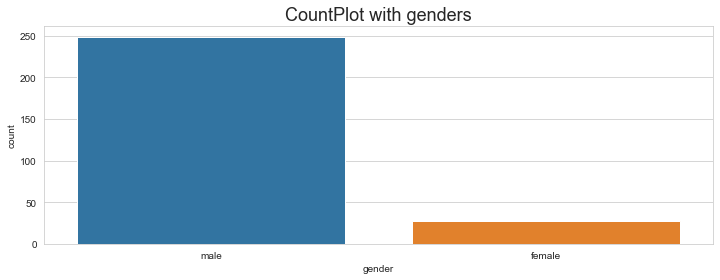

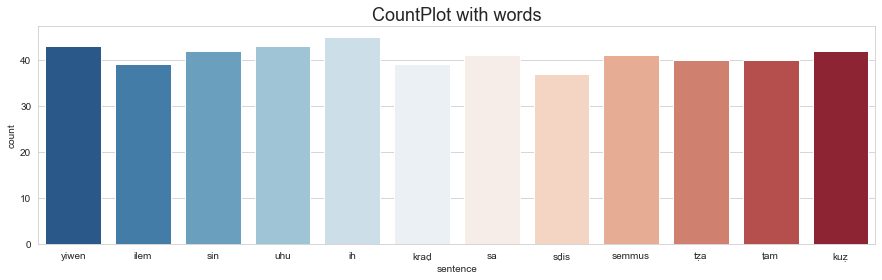

In [19]:
#load tsv in this language
kab_dev = pd.read_csv('gender data/kab/dev.tsv',sep='	')
kab_inval = pd.read_csv('gender data/kab/invalidated.tsv',sep='	')
kab_other = pd.read_csv('gender data/kab/other.tsv',sep='	')
kab_reported = pd.read_csv('gender data/kab/reported.tsv',sep='	')
kab_test = pd.read_csv('gender data/kab/test.tsv',sep='	')
kab_train = pd.read_csv('gender data/kab/train.tsv',sep='	')
kab_val = pd.read_csv('gender data/kab/validated.tsv',sep='	')

#keep the attributes that we need
kab_dev=kab_dev[['path','sentence','age','gender','locale']]
kab_inval=kab_dev[['path','sentence','age','gender','locale']]
kab_other=kab_other[['path','sentence','age','gender','locale']]
kab_test=kab_test[['path','sentence','age','gender','locale']]
kab_train=kab_train[['path','sentence','age','gender','locale']]
kab_val=kab_val[['path','sentence','age','gender','locale']]

#concatenation
kab_concat=pd.concat([kab_dev, kab_inval, kab_other, kab_test, kab_train, kab_val]).drop_duplicates()

#513 are all the voice records - 492 our instances
print('Counter for values:')
allLanguagesGenderCount['kab'] =kab_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=kab_concat['gender'],data=kab_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=kab_concat['sentence'],data=kab_concat,palette='RdBu_r');

## 18.Singapore (Mandarin Chinese)
<a id="Singapore"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN  


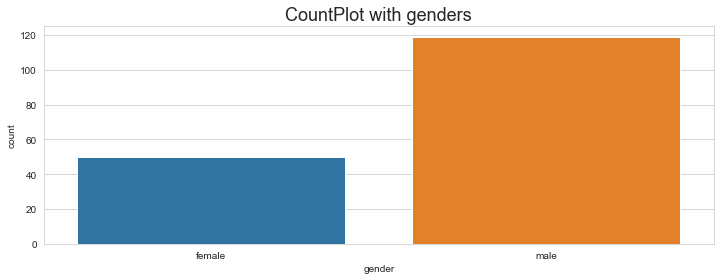

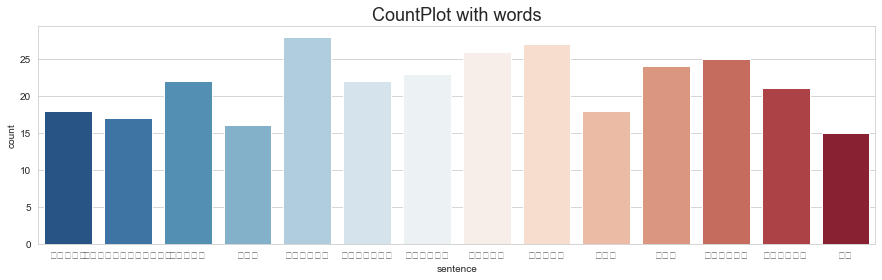

In [20]:
#load tsv in this language
ta_dev = pd.read_csv('gender data/ta/dev.tsv',sep='	')
ta_inval = pd.read_csv('gender data/ta/invalidated.tsv',sep='	')
ta_other = pd.read_csv('gender data/ta/other.tsv',sep='	')
ta_reported = pd.read_csv('gender data/ta/reported.tsv',sep='	')
ta_test = pd.read_csv('gender data/ta/test.tsv',sep='	')
ta_train = pd.read_csv('gender data/ta/train.tsv',sep='	')
ta_val = pd.read_csv('gender data/ta/validated.tsv',sep='	')

#keep the attributes that we need
ta_dev=ta_dev[['path','sentence','age','gender','locale']]
ta_inval=ta_dev[['path','sentence','age','gender','locale']]
ta_other=ta_other[['path','sentence','age','gender','locale']]
ta_test=ta_test[['path','sentence','age','gender','locale']]
ta_train=ta_train[['path','sentence','age','gender','locale']]
ta_val=ta_val[['path','sentence','age','gender','locale']]

#concatenation
ta_concat=pd.concat([ta_dev, ta_inval, ta_other, ta_test, ta_train, ta_val]).drop_duplicates()

#341 are all the voice records - 302 our instances
print('Counter for values:')
allLanguagesGenderCount['ta'] =ta_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ta_concat['gender'],data=ta_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ta_concat['sentence'],data=ta_concat,palette='RdBu_r');

## 19.West Frisian
<a id="WestFrisian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  


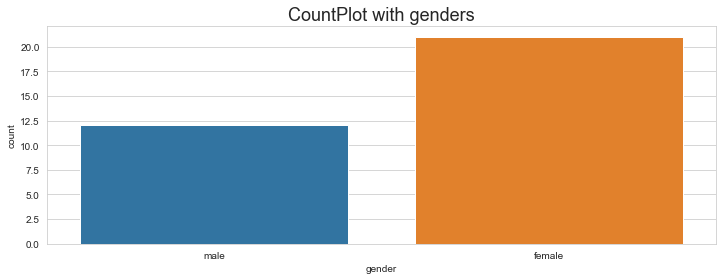

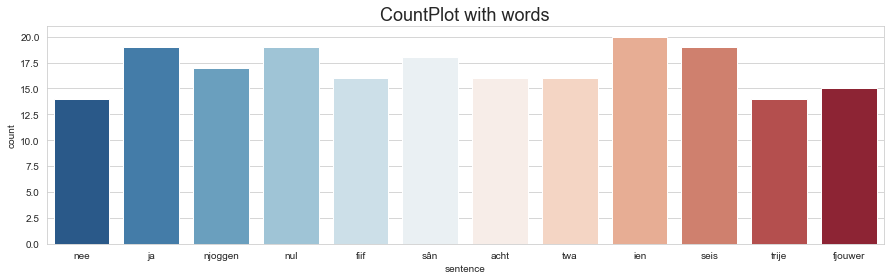

In [21]:
#load tsv in this language
fy_NLdev = pd.read_csv('gender data/fy-NL/dev.tsv',sep='	')
fy_NLinval = pd.read_csv('gender data/fy-NL/invalidated.tsv',sep='	')
fy_NLother = pd.read_csv('gender data/fy-NL/other.tsv',sep='	')
fy_NLreported = pd.read_csv('gender data/fy-NL/reported.tsv',sep='	')
fy_NLtest = pd.read_csv('gender data/fy-NL/test.tsv',sep='	')
fy_NLtrain = pd.read_csv('gender data/fy-NL/train.tsv',sep='	')
fy_NLval = pd.read_csv('gender data/fy-NL/validated.tsv',sep='	')

#keep the attributes that we need
fy_NLdev=fy_NLdev[['path','sentence','age','gender','locale']]
fy_NLinval=fy_NLdev[['path','sentence','age','gender','locale']]
fy_NLother=fy_NLother[['path','sentence','age','gender','locale']]
fy_NLtest=fy_NLtest[['path','sentence','age','gender','locale']]
fy_NLtrain=fy_NLtrain[['path','sentence','age','gender','locale']]
fy_NLval=fy_NLval[['path','sentence','age','gender','locale']]

#concatenation
fy_NLconcat=pd.concat([fy_NLdev, fy_NLinval, fy_NLother, fy_NLtest, fy_NLtrain, fy_NLval]).drop_duplicates()

#216 are all the voice records - 203 our instances
print('Counter for values:')
allLanguagesGenderCount['fy-NL'] =fy_NLconcat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fy_NLconcat['gender'],data=fy_NLconcat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=fy_NLconcat['sentence'],data=fy_NLconcat,palette='RdBu_r');

## 20.Indonesian
<a id="Indonesian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  id  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   8  


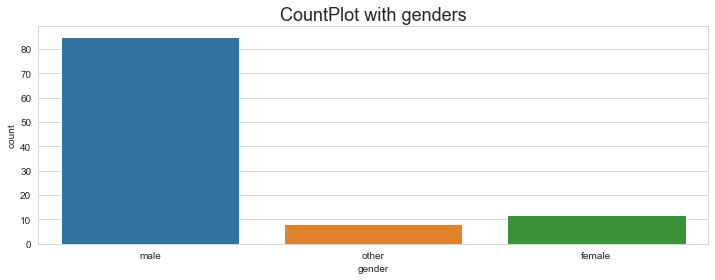

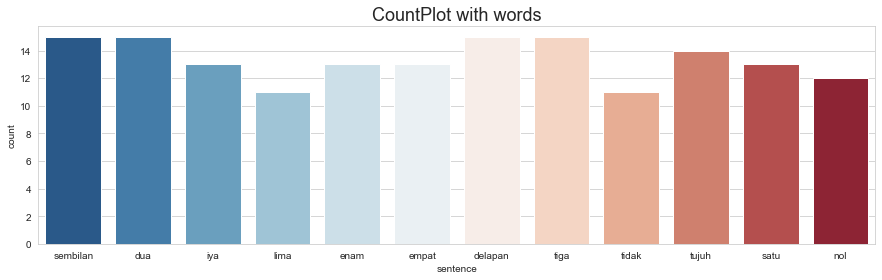

In [22]:
#load tsv in this language
id_dev = pd.read_csv('gender data/id/dev.tsv',sep='	')
id_inval = pd.read_csv('gender data/id/invalidated.tsv',sep='	')
id_other = pd.read_csv('gender data/id/other.tsv',sep='	')
id_reported = pd.read_csv('gender data/id/reported.tsv',sep='	')
id_test = pd.read_csv('gender data/id/test.tsv',sep='	')
id_train = pd.read_csv('gender data/id/train.tsv',sep='	')
id_val = pd.read_csv('gender data/id/validated.tsv',sep='	')

#keep the attributes that we need
id_dev=id_dev[['path','sentence','age','gender','locale']]
id_inval=id_dev[['path','sentence','age','gender','locale']]
id_other=id_other[['path','sentence','age','gender','locale']]
id_test=id_test[['path','sentence','age','gender','locale']]
id_train=id_train[['path','sentence','age','gender','locale']]
id_val=id_val[['path','sentence','age','gender','locale']]

#concatenation
id_concat=pd.concat([id_dev, id_inval, id_other, id_test, id_train, id_val]).drop_duplicates()

#171 are all the voice records - 160 our instances
print('Counter for values:')
allLanguagesGenderCount['id'] =id_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=id_concat['gender'],data=id_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=id_concat['sentence'],data=id_concat,palette='RdBu_r');

## 21.Cape Verde
<a id="CapeVerde"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  id    cv  
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   8   NaN  

[4 rows x 21 columns]


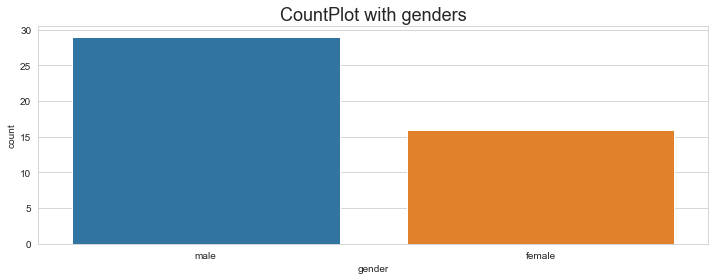

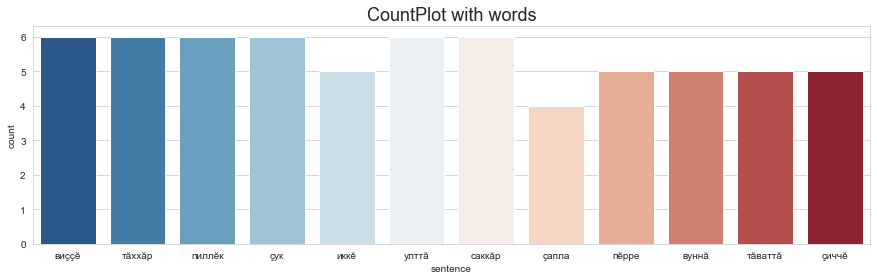

In [23]:
#load tsv in this language
cv_dev = pd.read_csv('gender data/cv/dev.tsv',sep='	')
cv_inval = pd.read_csv('gender data/cv/invalidated.tsv',sep='	')
cv_other = pd.read_csv('gender data/cv/other.tsv',sep='	')
cv_reported = pd.read_csv('gender data/cv/reported.tsv',sep='	')
cv_test = pd.read_csv('gender data/cv/test.tsv',sep='	')
cv_train = pd.read_csv('gender data/cv/train.tsv',sep='	')
cv_val = pd.read_csv('gender data/cv/validated.tsv',sep='	')

#keep the attributes that we need
cv_dev=cv_dev[['path','sentence','age','gender','locale']]
cv_inval=cv_dev[['path','sentence','age','gender','locale']]
cv_other=cv_other[['path','sentence','age','gender','locale']]
cv_test=cv_test[['path','sentence','age','gender','locale']]
cv_train=cv_train[['path','sentence','age','gender','locale']]
cv_val=cv_val[['path','sentence','age','gender','locale']]

#concatenation
cv_concat=pd.concat([cv_dev, cv_inval, cv_other, cv_test, cv_train, cv_val]).drop_duplicates()

#67 are all the voice records - 65 our instances
print('Counter for values:')
allLanguagesGenderCount['cv'] =cv_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cv_concat['gender'],data=cv_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=cv_concat['sentence'],data=cv_concat,palette='RdBu_r');

## 22.Luganda
<a id="Luganda"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           ar     cy     cs     tr    kab     ta  fy-NL  id    cv    lg  
NaN     246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  
male    231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  
female   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0  
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN   8   NaN   NaN  

[4 rows x 22 columns]


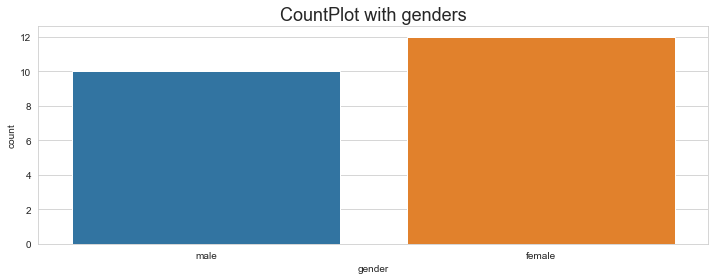

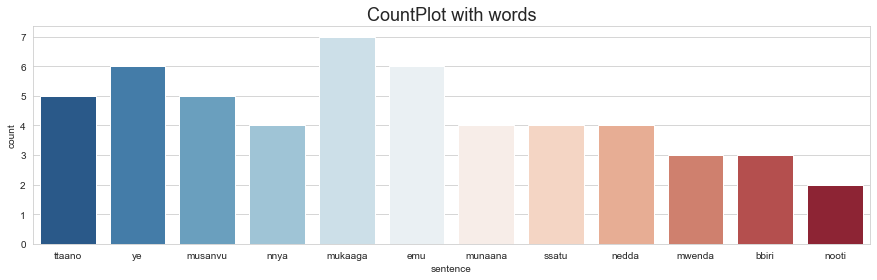

In [24]:
#load tsv in this language
lg_dev = pd.read_csv('gender data/lg/dev.tsv',sep='	')
lg_inval = pd.read_csv('gender data/lg/invalidated.tsv',sep='	')
lg_other = pd.read_csv('gender data/lg/other.tsv',sep='	')
lg_reported = pd.read_csv('gender data/lg/reported.tsv',sep='	')
lg_test = pd.read_csv('gender data/lg/test.tsv',sep='	')
lg_train = pd.read_csv('gender data/lg/train.tsv',sep='	')
lg_val = pd.read_csv('gender data/lg/validated.tsv',sep='	')

#keep the attributes that we need
lg_dev=lg_dev[['path','sentence','age','gender','locale']]
lg_inval=lg_dev[['path','sentence','age','gender','locale']]
lg_other=lg_other[['path','sentence','age','gender','locale']]
lg_test=lg_test[['path','sentence','age','gender','locale']]
lg_train=lg_train[['path','sentence','age','gender','locale']]
lg_val=lg_val[['path','sentence','age','gender','locale']]

#concatenation
lg_concat=pd.concat([lg_dev, lg_inval, lg_other, lg_test, lg_train, lg_val]).drop_duplicates()

#56 are all the voice records - 53 our instances
print('Counter for values:')
allLanguagesGenderCount['lg'] =lg_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=lg_concat['gender'],data=lg_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=lg_concat['sentence'],data=lg_concat,palette='RdBu_r');

## 23.Trinidad and Tobago
<a id="Trinidad"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           cy     cs     tr    kab     ta  fy-NL  id    cv    lg    tt  
NaN     291.0  370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  30.0  
male    129.0  129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  
female  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0  
other     NaN    NaN    NaN    NaN    NaN    NaN   8   NaN   NaN   NaN  

[4 rows x 23 columns]


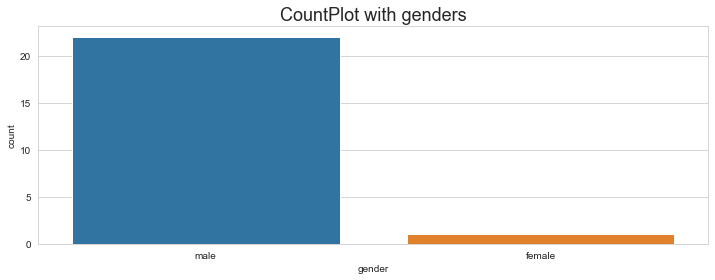

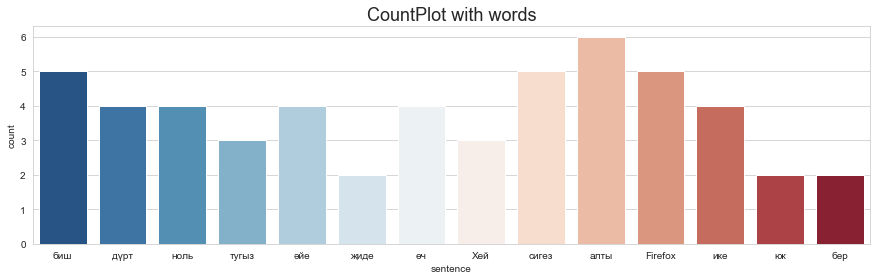

In [25]:
#load tsv in this language
tt_dev = pd.read_csv('gender data/tt/dev.tsv',sep='	')
tt_inval = pd.read_csv('gender data/tt/invalidated.tsv',sep='	')
tt_other = pd.read_csv('gender data/tt/other.tsv',sep='	')
tt_reported = pd.read_csv('gender data/tt/reported.tsv',sep='	')
tt_test = pd.read_csv('gender data/tt/test.tsv',sep='	')
tt_train = pd.read_csv('gender data/tt/train.tsv',sep='	')
tt_val = pd.read_csv('gender data/tt/validated.tsv',sep='	')

#keep the attributes that we need
tt_dev=tt_dev[['path','sentence','age','gender','locale']]
tt_inval=tt_dev[['path','sentence','age','gender','locale']]
tt_other=tt_other[['path','sentence','age','gender','locale']]
tt_test=tt_test[['path','sentence','age','gender','locale']]
tt_train=tt_train[['path','sentence','age','gender','locale']]
tt_val=tt_val[['path','sentence','age','gender','locale']]

#concatenation
tt_concat=pd.concat([tt_dev, tt_inval, tt_other, tt_test, tt_train, tt_val]).drop_duplicates()

#55 are all the voice records - 53 our instances
print('Counter for values:')
allLanguagesGenderCount['tt'] =tt_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tt_concat['gender'],data=tt_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=tt_concat['sentence'],data=tt_concat,palette='RdBu_r');

## 24.Breton
<a id="Breton"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           cs     tr    kab     ta  fy-NL  id    cv    lg    tt    br  
NaN     370.0  240.0  216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  
male    129.0  225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  
female   29.0   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN  
other     NaN    NaN    NaN    NaN    NaN   8   NaN   NaN   NaN   NaN  

[4 rows x 24 columns]


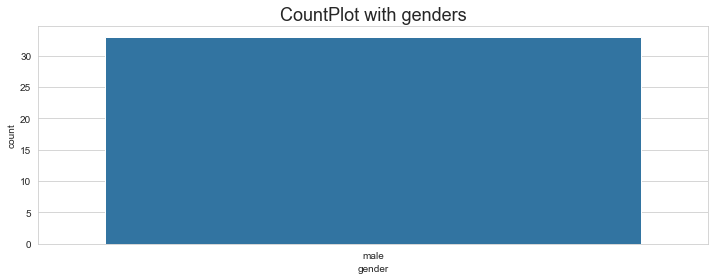

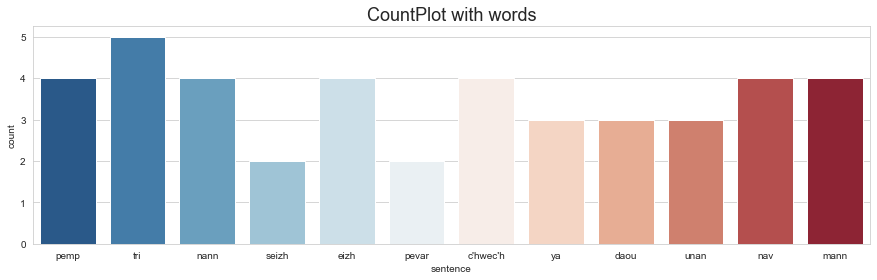

In [26]:
#load tsv in this language
br_dev = pd.read_csv('gender data/br/dev.tsv',sep='	')
br_inval = pd.read_csv('gender data/br/invalidated.tsv',sep='	')
br_other = pd.read_csv('gender data/br/other.tsv',sep='	')
br_reported = pd.read_csv('gender data/br/reported.tsv',sep='	')
br_test = pd.read_csv('gender data/br/test.tsv',sep='	')
br_train = pd.read_csv('gender data/br/train.tsv',sep='	')
br_val = pd.read_csv('gender data/br/validated.tsv',sep='	')

#keep the attributes that we need
br_dev=br_dev[['path','sentence','age','gender','locale']]
br_inval=br_dev[['path','sentence','age','gender','locale']]
br_other=br_other[['path','sentence','age','gender','locale']]
br_test=br_test[['path','sentence','age','gender','locale']]
br_train=br_train[['path','sentence','age','gender','locale']]
br_val=br_val[['path','sentence','age','gender','locale']]

#concatenation
br_concat=pd.concat([br_dev, br_inval, br_other, br_test, br_train, br_val]).drop_duplicates()

#42 are all the voice records - 42 our instances
print('Counter for values:')
allLanguagesGenderCount['br'] =br_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=br_concat['gender'],data=br_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=br_concat['sentence'],data=br_concat,palette='RdBu_r');

## 25.Georgian
<a id="Georgian"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           tr    kab     ta  fy-NL  id    cv    lg    tt    br    ka  
NaN     240.0  216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  17.0  
male    225.0  249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  12.0  
female   26.0   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN  
other     NaN    NaN    NaN    NaN   8   NaN   NaN   NaN   NaN   NaN  

[4 rows x 25 columns]


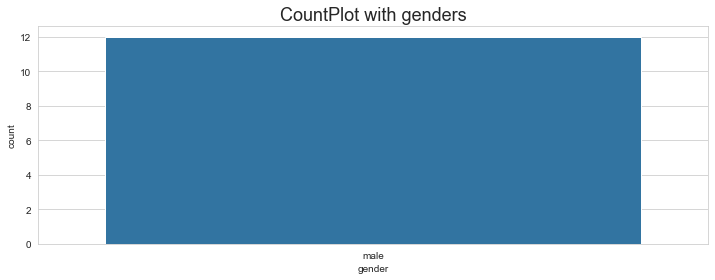

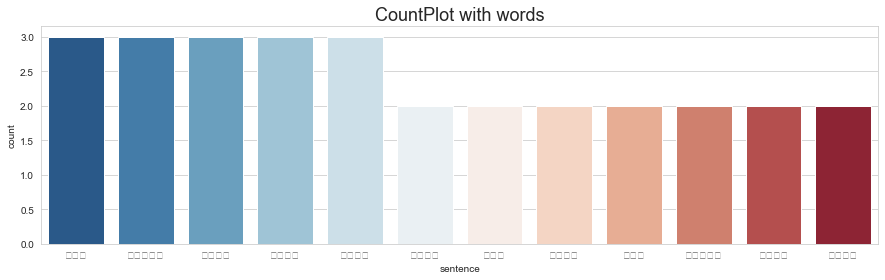

In [27]:
#load tsv in this language
ka_dev = pd.read_csv('gender data/ka/dev.tsv',sep='	')
ka_inval = pd.read_csv('gender data/ka/invalidated.tsv',sep='	')
ka_other = pd.read_csv('gender data/ka/other.tsv',sep='	')
ka_reported = pd.read_csv('gender data/ka/reported.tsv',sep='	')
ka_test = pd.read_csv('gender data/ka/test.tsv',sep='	')
ka_train = pd.read_csv('gender data/ka/train.tsv',sep='	')
ka_val = pd.read_csv('gender data/ka/validated.tsv',sep='	')

#keep the attributes that we need
ka_dev=ka_dev[['path','sentence','age','gender','locale']]
ka_inval=ka_dev[['path','sentence','age','gender','locale']]
ka_other=ka_other[['path','sentence','age','gender','locale']]
ka_test=ka_test[['path','sentence','age','gender','locale']]
ka_train=ka_train[['path','sentence','age','gender','locale']]
ka_val=ka_val[['path','sentence','age','gender','locale']]

#concatenation
ka_concat=pd.concat([ka_dev, ka_inval, ka_other, ka_test, ka_train, ka_val]).drop_duplicates()

#29 are all the voice records - 29 our instances
print('Counter for values:')
allLanguagesGenderCount['ka'] =ka_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ka_concat['gender'],data=ka_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=ka_concat['sentence'],data=ka_concat,palette='RdBu_r');

## 26.Swedish
<a id="Swedish"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

          kab     ta  fy-NL  id    cv    lg    tt    br    ka  sv-SE  
NaN     216.0  133.0  170.0  55  20.0  31.0  30.0   9.0  17.0   15.0  
male    249.0  119.0   12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  
female   27.0   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0  
other     NaN    NaN    NaN   8   NaN   NaN   NaN   NaN   NaN    NaN  

[4 rows x 26 columns]


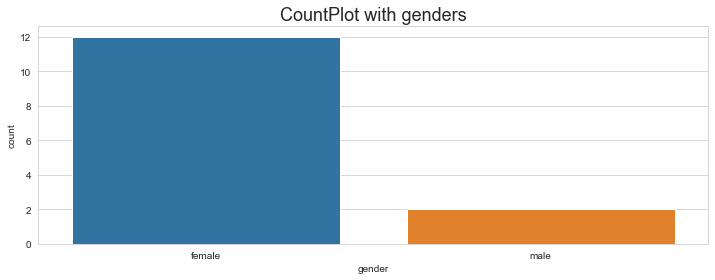

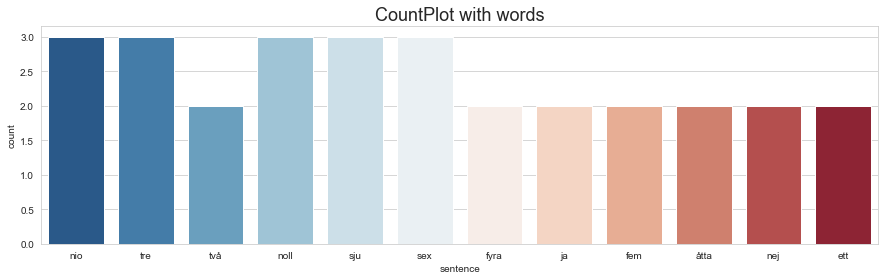

In [28]:
#load tsv in this language
sv_SE_dev = pd.read_csv('gender data/sv-SE/dev.tsv',sep='	')
sv_SE_inval = pd.read_csv('gender data/sv-SE/invalidated.tsv',sep='	')
sv_SE_other = pd.read_csv('gender data/sv-SE/other.tsv',sep='	')
sv_SE_reported = pd.read_csv('gender data/sv-SE/reported.tsv',sep='	')
sv_SE_test = pd.read_csv('gender data/sv-SE/test.tsv',sep='	')
sv_SE_train = pd.read_csv('gender data/sv-SE/train.tsv',sep='	')
sv_SE_val = pd.read_csv('gender data/sv-SE/validated.tsv',sep='	')

#keep the attributes that we need
sv_SE_dev=sv_SE_dev[['path','sentence','age','gender','locale']]
sv_SE_inval=sv_SE_dev[['path','sentence','age','gender','locale']]
sv_SE_other=sv_SE_other[['path','sentence','age','gender','locale']]
sv_SE_test=sv_SE_test[['path','sentence','age','gender','locale']]
sv_SE_train=sv_SE_train[['path','sentence','age','gender','locale']]
sv_SE_val=sv_SE_val[['path','sentence','age','gender','locale']]

#concatenation
sv_SE_concat=pd.concat([sv_SE_dev, sv_SE_inval, sv_SE_other, sv_SE_test, sv_SE_train, sv_SE_val]).drop_duplicates()

#29 are all the voice records - 29 our instances
print('Counter for values:')
allLanguagesGenderCount['sv-SE'] =sv_SE_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=sv_SE_concat['gender'],data=sv_SE_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=sv_SE_concat['sentence'],data=sv_SE_concat,palette='RdBu_r');

## 27.Rwanda ( Kinyarwanda,English, French)
<a id="Rwanda"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

           ta  fy-NL  id    cv    lg    tt    br    ka  sv-SE    rw  
NaN     133.0  170.0  55  20.0  31.0  30.0   9.0  17.0   15.0   4.0  
male    119.0   12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  12.0  
female   50.0   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0   NaN  
other     NaN    NaN   8   NaN   NaN   NaN   NaN   NaN    NaN   NaN  

[4 rows x 27 columns]


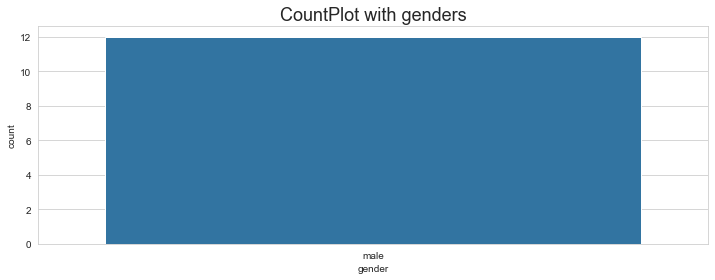

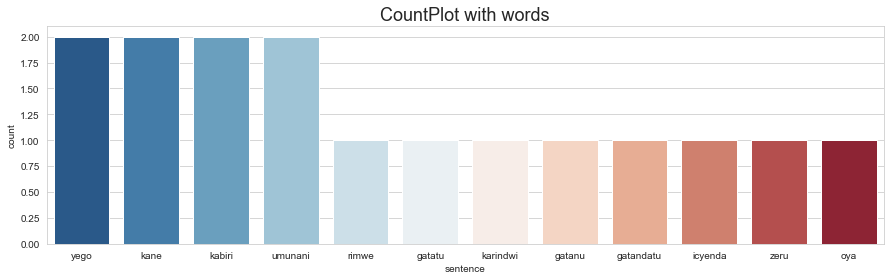

In [29]:
#load tsv in this language
rw_dev = pd.read_csv('gender data/rw/dev.tsv',sep='	')
rw_inval = pd.read_csv('gender data/rw/invalidated.tsv',sep='	')
rw_other = pd.read_csv('gender data/rw/other.tsv',sep='	')
rw_reported = pd.read_csv('gender data/rw/reported.tsv',sep='	')
rw_test = pd.read_csv('gender data/rw/test.tsv',sep='	')
rw_train = pd.read_csv('gender data/rw/train.tsv',sep='	')
rw_val = pd.read_csv('gender data/rw/validated.tsv',sep='	')

#keep the attributes that we need
rw_dev=rw_dev[['path','sentence','age','gender','locale']]
rw_inval=rw_dev[['path','sentence','age','gender','locale']]
rw_other=rw_other[['path','sentence','age','gender','locale']]
rw_test=rw_test[['path','sentence','age','gender','locale']]
rw_train=rw_train[['path','sentence','age','gender','locale']]
rw_val=rw_val[['path','sentence','age','gender','locale']]

#concatenation
rw_concat=pd.concat([rw_dev, rw_inval, rw_other, rw_test, rw_train, rw_val]).drop_duplicates()

#16 are all the voice records - 16 our instances
print('Counter for values:')
allLanguagesGenderCount['rw'] =rw_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=rw_concat['gender'],data=rw_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=rw_concat['sentence'],data=rw_concat,palette='RdBu_r');

## 28.Chinese (Traditional, Hong Kong S.A.R.)
<a id="ChineseTraditional"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...   
other     176    442    131    44    13   14   12   10   10    NaN  ...   

        fy-NL  id    cv    lg    tt    br    ka  sv-SE    rw  zh_HK  
NaN     170.0  55  20.0  31.0  30.0   9.0  17.0   15.0   4.0  349.0  
male     12.0  85  29.0  10.0  22.0  33.0  12.0    2.0  12.0  100.0  
female   21.0  12  16.0  12.0   1.0   NaN   NaN   12.0   NaN   33.0  
other     NaN   8   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN  

[4 rows x 28 columns]


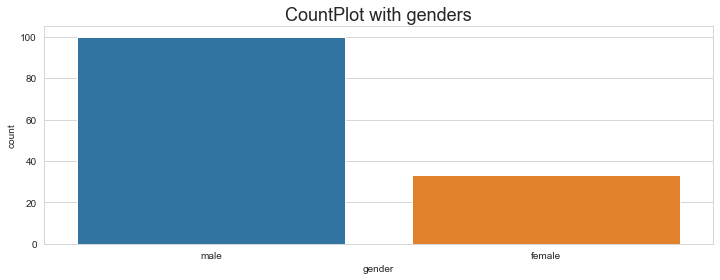

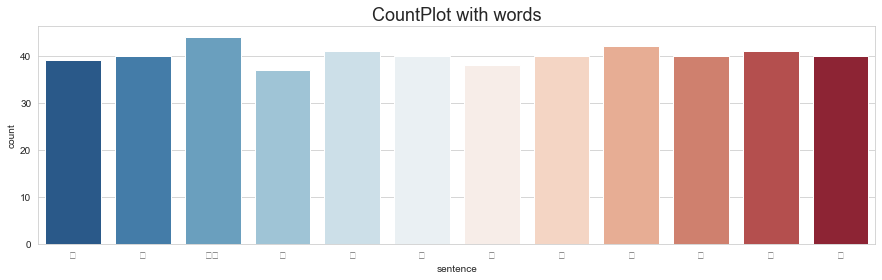

In [30]:
#load tsv in this language
zh_HK_dev = pd.read_csv('gender data/zh-HK/dev.tsv',sep='	')
zh_HK_inval = pd.read_csv('gender data/zh-HK/invalidated.tsv',sep='	')
zh_HK_other = pd.read_csv('gender data/zh-HK/other.tsv',sep='	')
zh_HK_reported = pd.read_csv('gender data/zh-HK/reported.tsv',sep='	')
zh_HK_test = pd.read_csv('gender data/zh-HK/test.tsv',sep='	')
zh_HK_train = pd.read_csv('gender data/zh-HK/train.tsv',sep='	')
zh_HK_val = pd.read_csv('gender data/zh-HK/validated.tsv',sep='	')

#keep the attributes that we need
zh_HK_dev=zh_HK_dev[['path','sentence','age','gender','locale']]
zh_HK_inval=zh_HK_dev[['path','sentence','age','gender']]
zh_HK_other=zh_HK_other[['path','sentence','age','gender','locale']]
zh_HK_test=zh_HK_test[['path','sentence','age','gender','locale']]
zh_HK_train=zh_HK_train[['path','sentence','age','gender','locale']]
zh_HK_val=zh_HK_val[['path','sentence','age','gender','locale']]

#concatenation
zh_HK_concat=pd.concat([zh_HK_dev, zh_HK_inval, zh_HK_other, zh_HK_test, zh_HK_train, zh_HK_val]).drop_duplicates()

#503 are all the voice records - 482 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_HK'] =zh_HK_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_HK_concat['gender'],data=zh_HK_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_HK_concat['sentence'],data=zh_HK_concat,palette='RdBu_r');

## 29.Chinese (PRC=People's Republic of China)
<a id="Chinese"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...  id  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...  55   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...  85   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...  12   
other     176    442    131    44    13   14   12   10   10    NaN  ...   8   

          cv    lg    tt    br    ka  sv-SE    rw  zh_HK  zh_CN  
NaN     20.0  31.0  30.0   9.0  17.0   15.0   4.0  349.0  147.0  
male    29.0  10.0  22.0  33.0  12.0    2.0  12.0  100.0  117.0  
female  16.0  12.0   1.0   NaN   NaN   12.0   NaN   33.0   31.0  
other    NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN  

[4 rows x 29 columns]


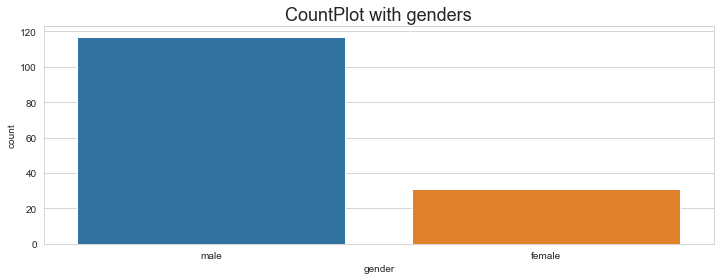

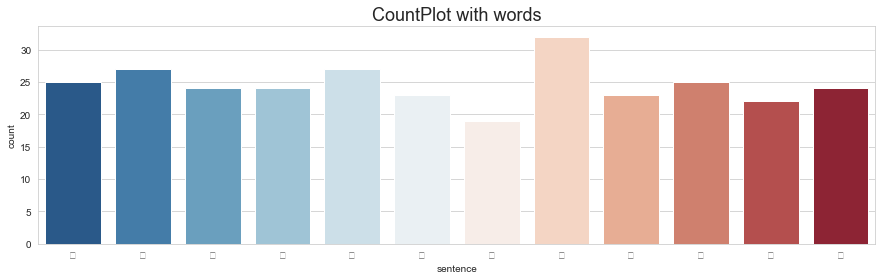

In [31]:
#load tsv in this language
zh_CN_dev = pd.read_csv('gender data/zh-CN/dev.tsv',sep='	')
zh_CN_inval = pd.read_csv('gender data/zh-CN/invalidated.tsv',sep='	')
zh_CN_other = pd.read_csv('gender data/zh-CN/other.tsv',sep='	')
zh_CN_reported = pd.read_csv('gender data/zh-CN/reported.tsv',sep='	')
zh_CN_test = pd.read_csv('gender data/zh-CN/test.tsv',sep='	')
zh_CN_train = pd.read_csv('gender data/zh-CN/train.tsv',sep='	')
zh_CN_val = pd.read_csv('gender data/zh-CN/validated.tsv',sep='	')

#keep the attributes that we need
zh_CN_dev=zh_CN_dev[['path','sentence','age','gender','locale']]
zh_CN_inval=zh_CN_dev[['path','sentence','age','gender','locale']]
zh_CN_other=zh_CN_other[['path','sentence','age','gender','locale']]
zh_CN_test=zh_CN_test[['path','sentence','age','gender','locale']]
zh_CN_train=zh_CN_train[['path','sentence','age','gender','locale']]
zh_CN_val=zh_CN_val[['path','sentence','age','gender','locale']]

#concatenation
zh_CN_concat=pd.concat([zh_CN_dev, zh_CN_inval, zh_CN_other, zh_CN_test, zh_CN_train, zh_CN_val]).drop_duplicates()

#319 are all the voice records - 295 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_CN'] =zh_CN_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_CN_concat['gender'],data=zh_CN_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_CN_concat['sentence'],data=zh_CN_concat,palette='RdBu_r');

## 30.Chinese (Taiwan)
<a id="Taiwan"></a> 

Counter for values:
           es     en     fr    de    ca   ru   pt   pl   eo     nl  ...    cv  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  ...  20.0   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  ...  29.0   
female   5655   4098   1231   802   479  122   66  147   45   32.0  ...  16.0   
other     176    442    131    44    13   14   12   10   10    NaN  ...   NaN   

          lg    tt    br    ka  sv-SE    rw  zh_HK  zh_CN  zh_TW  
NaN     31.0  30.0   9.0  17.0   15.0   4.0  349.0  147.0   10.0  
male    10.0  22.0  33.0  12.0    2.0  12.0  100.0  117.0   17.0  
female  12.0   1.0   NaN   NaN   12.0   NaN   33.0   31.0    NaN  
other    NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN  

[4 rows x 30 columns]


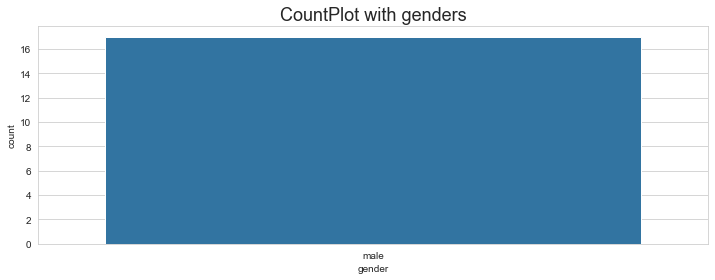

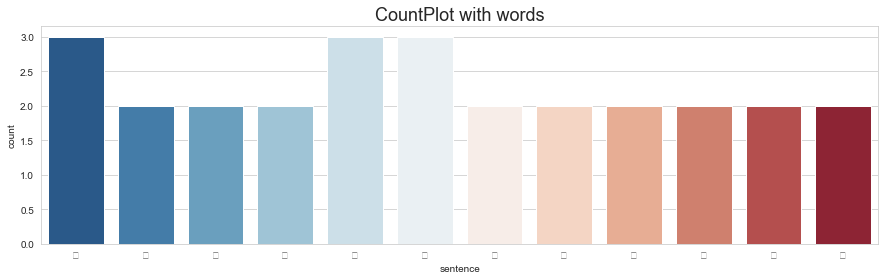

In [32]:
#load tsv in this language
zh_TW_dev = pd.read_csv('gender data/zh-TW/dev.tsv',sep='	')
zh_TW_inval = pd.read_csv('gender data/zh-TW/invalidated.tsv',sep='	')
zh_TW_other = pd.read_csv('gender data/zh-TW/other.tsv',sep='	')
zh_TW_reported = pd.read_csv('gender data/zh-TW/reported.tsv',sep='	')
zh_TW_test = pd.read_csv('gender data/zh-TW/test.tsv',sep='	')
zh_TW_train = pd.read_csv('gender data/zh-TW/train.tsv',sep='	')
zh_TW_val = pd.read_csv('gender data/zh-TW/validated.tsv',sep='	')

#keep the attributes that we need
zh_TW_dev=zh_TW_dev[['path','sentence','age','gender','locale']]
zh_TW_inval=zh_TW_dev[['path','sentence','age','gender','locale']]
zh_TW_other=zh_TW_other[['path','sentence','age','gender','locale']]
zh_TW_test=zh_TW_test[['path','sentence','age','gender','locale']]
zh_TW_train=zh_TW_train[['path','sentence','age','gender','locale']]
zh_TW_val=zh_TW_val[['path','sentence','age','gender','locale']]

#concatenation
zh_TW_concat=pd.concat([zh_TW_dev, zh_TW_inval, zh_TW_other, zh_TW_test, zh_TW_train, zh_TW_val]).drop_duplicates()

#319 are all the voice records - 295 our instances
print('Counter for values:')
allLanguagesGenderCount['zh_TW'] =zh_TW_concat.gender.value_counts(dropna=False)
print(allLanguagesGenderCount)

#plot with genders
plt.figure(figsize=(12,4))
plt.title('CountPlot with genders', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_TW_concat['gender'],data=zh_TW_concat);

#plot with count number of words that people say
plt.figure(figsize=(15,4))
plt.title('CountPlot with words', fontsize=18)
sns.set_style('whitegrid')
sns.countplot(x=zh_TW_concat['sentence'],data=zh_TW_concat,palette='RdBu_r');

## Summary 

In [33]:
allLanguagesGenderCount['SUM'] = allLanguagesGenderCount.sum(axis=1)

pd.set_option('display.max_columns', None)
display(allLanguagesGenderCount)

#scroll right to see the sum

es     en     fr    de    ca   ru   pt   pl   eo     nl   ja  \
NaN     46242  27274  13723  8513  2087  979  464  535  419  306.0  183   
male    11423  13485   4952  4345  1384  976  678  453  450  285.0  266   
female   5655   4098   1231   802   479  122   66  147   45   32.0  152   
other     176    442    131    44    13   14   12   10   10    NaN    9   

           eu     ar     cy     cs     tr    kab     ta  fy-NL  id    cv  \
NaN     460.0  246.0  291.0  370.0  240.0  216.0  133.0  170.0  55  20.0   
male    110.0  231.0  129.0  129.0  225.0  249.0  119.0   12.0  85  29.0   
female   52.0   42.0  118.0   29.0   26.0   27.0   50.0   21.0  12  16.0   
other     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   8   NaN   

          lg    tt    br    ka  sv-SE    rw  zh_HK  zh_CN  zh_TW       SUM  
NaN     31.0  30.0   9.0  17.0   15.0   4.0  349.0  147.0   10.0  103538.0  
male    10.0  22.0  33.0  12.0    2.0  12.0  100.0  117.0   17.0   40340.0  
female  12.0   1.0   NaN   NaN   12.0   NaN   33.0   31.0    NaN   13311.0  
other    NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN     869.0